In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import math
from astropy.visualization import quantity_support
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file
import pylab as pl
from astropy.utils import data
data.conf.remote_timeout = 60
import vapeplot
vapeplot.set_palette('jazzcup')
from spectral_cube import SpectralCube

from pvextractor import extract_pv_slice, Path
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import wcs
from reproject import reproject_interp


from astropy.coordinates import SkyCoord



pl.rcParams['figure.facecolor']='w'

In [13]:
loc = 'data/'
vers = 'pbcorr' 
name= '_J1059_09_HI.image'
fullname = loc+vers+name
ext = '.fits'
image = '_S1237'
mom1 = '_mom1'
outloc = loc + 'plots/' + vers + name
optname = '_highresoptical'
imagename = fullname+image+ext
mom1name = fullname+mom1+image+ext
optfile = fullname+optname+image+ext
hdu_list = fits.open(imagename)
hdu0_list = fits.open(mom1name)
hdu2_list = fits.open(optfile)
cube = SpectralCube.read(hdu_list)
data_mom1 = fits.getdata(mom1name)
header_mom1 = fits.getheader(mom1name)
data_opt = fits.getdata(optfile)
header_opt = fits.getheader(optfile)
print(cube)
image_data = hdu_list[0].data
print(type(image_data))
print(data_mom1.shape)

SpectralCube with shape=(189, 250, 200) and unit=Jy / beam:
 n_x:    200  type_x: RA---SIN  unit_x: deg    range:   165.283442 deg:  165.396040 deg
 n_y:    250  type_y: DEC--SIN  unit_y: deg    range:   -10.362526 deg:  -10.224016 deg
 n_s:    189  type_s: VRAD      unit_s: m / s  range:  7508465.359 m / s: 8544933.433 m / s
<class 'numpy.ndarray'>
(250, 200)


INFO: Auto-setting vmin to -1.615e-03 [aplpy.core]
INFO: Auto-setting vmax to  5.394e-03 [aplpy.core]


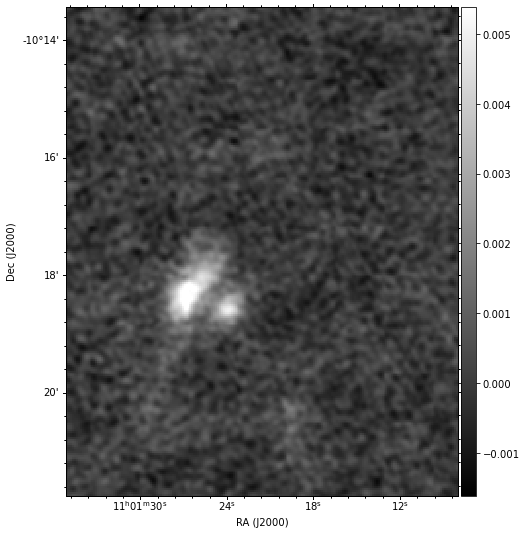

In [14]:
cube[105, :, :].quicklook()

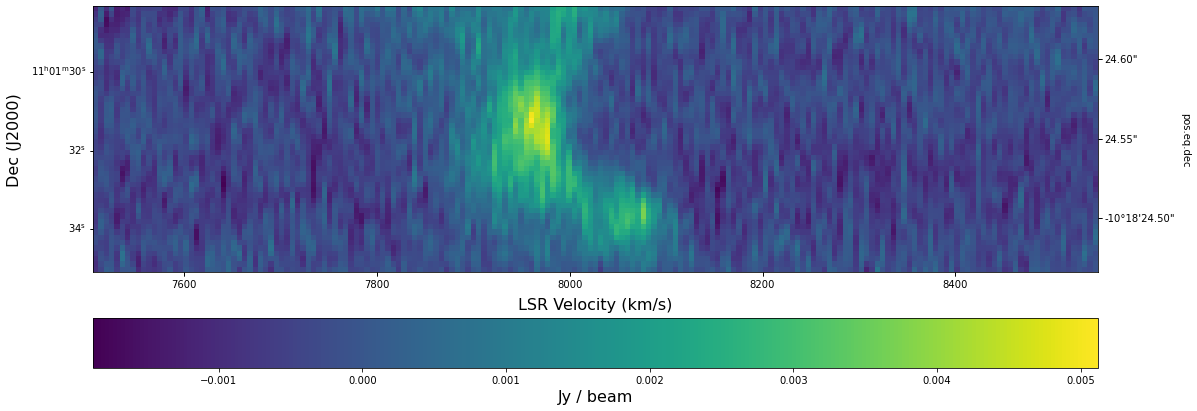

In [5]:
lat_slice = 100 # Index of latitude dimension to slice along
sub_cube = cube[:, 81:131, :]  
# Initiate a figure and axis object with WCS projection information
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection=cube.wcs, slices=('y', lat_slice, 'x'))
# Above, we have specified to plot the longitude along the y axis, pick only the lat_slice 
# indicated, and plot the velocity along the x axis

# Display the slice
im = ax.imshow(sub_cube[:, :, 69].transpose().data)  # Display the image slice
#ax.invert_yaxis()  # Flips the Y axis 
ax.invert_xaxis()

ax2 = ax.coords[2]
ax2.set_format_unit(u.km/u.s)

# Add axes labels
ax.set_xlabel("LSR Velocity (km/s)", fontsize=16)
ax.set_ylabel("Dec (J2000)", fontsize=16)

# Add a colorbar
cbar = plt.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label(cube.unit, size=16)

#plt.savefig('S1vert.pdf', bbox_inches='tight')

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [6]:
from matplotlib.offsetbox import AnchoredOffsetbox, AuxTransformBox
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from astropy.wcs.utils import proj_plane_pixel_scales

__all__ = ["add_beam", "add_scalebar"]

CORNERS = {
    "top right": 1,
    "top left": 2,
    "bottom left": 3,
    "bottom right": 4,
    "right": 5,
    "left": 6,
    "bottom": 8,
    "top": 9,
}

In [7]:
def add_beam(
    ax,
    header=None,
    major=None,
    minor=None,
    angle=None,
    corner="bottom left",
    frame=False,
    borderpad=0.4,
    pad=0.5,
    **kwargs,
):
    """
    Display the beam shape and size.

    Parameters
    ----------
    ax : :class:`~astropy.visualization.wcsaxes.WCSAxes`
        WCSAxes instance in which the beam shape and size is displayed. The WCS
        must be celestial.
    header : :class:`~astropy.io.fits.Header`, optional
        Header containing the beam parameters. If specified, the ``BMAJ``,
        ``BMIN``, and ``BPA`` keywords will be searched in the FITS header
        to set the major and minor axes and the position angle on the sky.
    major : float or :class:`~astropy.units.Quantity`, optional
        Major axis of the beam in degrees or an angular quantity.
    minor : float, or :class:`~astropy.units.Quantity`, optional
        Minor axis of the beam in degrees or an angular quantity.
    angle : float or :class:`~astropy.units.Quantity`, optional
        Position angle of the beam on the sky in degrees or an angular
        quantity in the anticlockwise direction.
    corner : str, optional
        The beam location. Acceptable values are ``'left'``, ``'right'``,
        ``'top'``, 'bottom', ``'top left'``, ``'top right'``, ``'bottom left'``
        (default), and ``'bottom right'``.
    frame : bool, optional
        Whether to display a frame behind the beam (default is ``False``).
    borderpad : float, optional
        Border padding, in fraction of the font size. Default is 0.4.
    pad : float, optional
        Padding around the beam, in fraction of the font size. Default is 0.5.
    kwargs
        Additional arguments are passed to :class:`matplotlib.patches.Ellipse`.

    Notes
    -----
    This function may be inaccurate when:

    - The pixel scales at the reference pixel are different from the pixel scales
      within the image extent (e.g., when the reference pixel is well outside of
      the image extent and the projection is non-linear)
    - The pixel scales in the two directions are very different from each other
      (e.g., rectangular pixels)

    """
    if header and major:
        raise ValueError(
            "Either header or major/minor/angle must be specified, not both."
        )

    if header:
        major = header["BMAJ"]
        minor = header["BMIN"]
        angle = header["BPA"]

    if isinstance(major, u.Quantity):
        major = major.to(u.degree).value

    if isinstance(minor, u.Quantity):
        minor = minor.to(u.degree).value

    if isinstance(angle, u.Quantity):
        angle = angle.to(u.degree).value

    if ax.wcs.is_celestial:
        pix_scale = proj_plane_pixel_scales(ax.wcs)
        sx = pix_scale[0]
        sy = pix_scale[1]
        degrees_per_pixel = np.sqrt(sx * sy)
    else:
        raise ValueError("Cannot show beam when WCS is not celestial")

    minor /= degrees_per_pixel
    major /= degrees_per_pixel

    aux_tr_box = AuxTransformBox(ax.transData)
    ellipse = Ellipse((0, 0), width=minor, height=major, angle=angle, **kwargs)
    aux_tr_box.add_artist(ellipse)
    box = AnchoredOffsetbox(
        child=aux_tr_box,
        pad=pad,
        borderpad=borderpad,
        loc=CORNERS[corner],
        frameon=frame,
    )
    ax.add_artist(box)

In [8]:
def add_scalebar(
    ax,
    length,
    label=None,
    corner="bottom right",
    frame=False,
    borderpad=0.4,
    pad=0.5,
    fsize = 14,
    **kwargs,
):
    """Add a scale bar.

    Parameters
    ----------
    ax : :class:`~astropy.visualization.wcsaxes.WCSAxes`
        WCSAxes instance in which the scale bar is displayed. The WCS must be
        celestial.
    length : float or :class:`~astropy.units.Quantity`
        The length of the scalebar in degrees or an angular quantity
    label : str, optional
        Label to place below the scale bar
    corner : str, optional
        Where to place the scale bar. Acceptable values are:, ``'left'``,
        ``'right'``, ``'top'``, ``'bottom'``, ``'top left'``, ``'top right'``,
        ``'bottom left'`` and ``'bottom right'`` (default)
    frame : bool, optional
        Whether to display a frame behind the scale bar (default is ``False``)
    borderpad : float, optional
        Border padding, in fraction of the font size. Default is 0.4.
    pad : float, optional
        Padding around the scale bar, in fraction of the font size. Default is 0.5.
    kwargs
        Additional arguments are passed to
        :class:`mpl_toolkits.axes_grid1.anchored_artists.AnchoredSizeBar`.

    Notes
    -----
    This function may be inaccurate when:

    - The pixel scales at the reference pixel are different from the pixel scales
      within the image extent (e.g., when the reference pixel is well outside of
      the image extent and the projection is non-linear)
    - The pixel scales in the two directions are very different from each other
      (e.g., rectangular pixels)

    """
    if isinstance(length, u.Quantity):
        length = length.to(u.degree).value

    if ax.wcs.is_celestial:
        pix_scale = proj_plane_pixel_scales(ax.wcs)
        sx = pix_scale[0]
        sy = pix_scale[1]
        degrees_per_pixel = np.sqrt(sx * sy)
    else:
        raise ValueError("Cannot show scalebar when WCS is not celestial")

    length = length / degrees_per_pixel

    corner = CORNERS[corner]
    
    fontprops = fm.FontProperties(size=fsize)

    scalebar = AnchoredSizeBar(
        ax.transData,
        length,
        label,
        corner,
        pad=pad,
        borderpad=borderpad,
        sep=5,
        frameon=frame,
        size_vertical=0.5,
        fontproperties=fontprops,
        **kwargs,
    )

    ax.add_artist(scalebar)

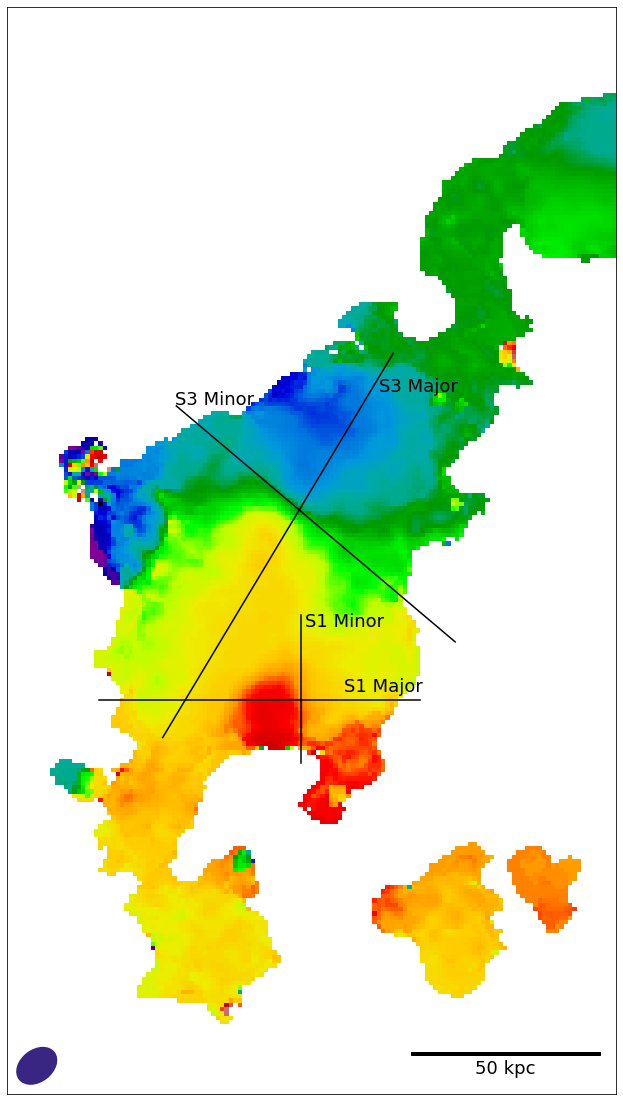

In [141]:
path = Path([(67,75),(67,110)])
path2 = Path([(20,90),(95,90)])
path3 = Path([(35,81),(89,171)])
path4 = Path([(38, 158),(103,103)])
momcp = data_mom1[0:250,10:150]
plt.figure(figsize = (20,20))
ax = plt.subplot(111, projection= wcs.WCS(header_mom1))

ax.imshow(momcp, cmap='nipy_spectral', vmin=7550, vmax=8100)
path.show_on_axis(ax, spacing=1, color ='k')
path2.show_on_axis(ax, spacing=1, color ='k')
path3.show_on_axis(ax, spacing=1, color = 'k')
path4.show_on_axis(ax, spacing=1, color = 'k')
ax.text(68,107, 'S1 Minor',fontsize=18)
ax.text(77,92,'S1 Major',fontsize=18)
ax.text(85,161,'S3 Major',fontsize=18)
ax.text(38, 158,'S3 Minor',fontsize=18)

ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")
add_beam(ax, header = header_mom1)
add_scalebar(ax, 0.02412932218197389, label = '50 kpc',fsize = 18)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')
plt.savefig('PVmom1.pdf', bbox_inches='tight')

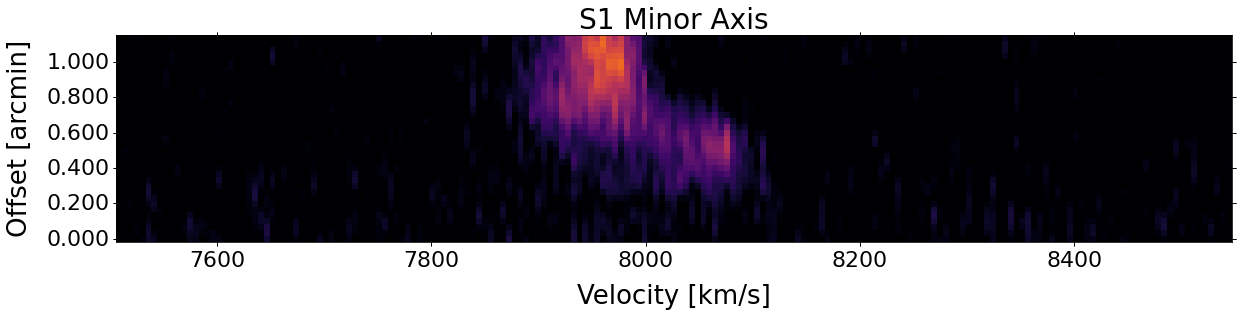

In [154]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
pv2 = extract_pv_slice(cube=cube,path=path2, spacing =1)
pv3 = extract_pv_slice(cube=cube, path =path3, spacing=1)
pv4 = extract_pv_slice(cube=cube, path =path4, spacing=1)
#pvdiagram.data[0,:]
pvdiagram.shape
pvcopy = pvdiagram.data[81:131,:]

ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram.data.T, cmap = 'inferno', vmin = -0.000, vmax = 0.008)
#cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')

ax.set_title('S1 Minor Axis', fontsize=28)
ax0 = ax.coords[1]
ax0.set_format_unit(u.km/u.s)
ax0.set_ticklabel(fontsize=22)
ax1 = ax.coords[0]
ax1.set_format_unit(u.arcmin)
ax1.set_ticklabel(fontsize=22)
cb.set_label(cube.unit, fontsize = 22)
cb.ax.tick_params(labelsize = 22)
ax.set_xlabel("Velocity [km/s]", fontsize = 26 )
ax.set_ylabel("Offset [arcmin]", fontsize = 26 )
ax.invert_xaxis()

plt.savefig('S1vert.pdf', bbox_inches='tight')

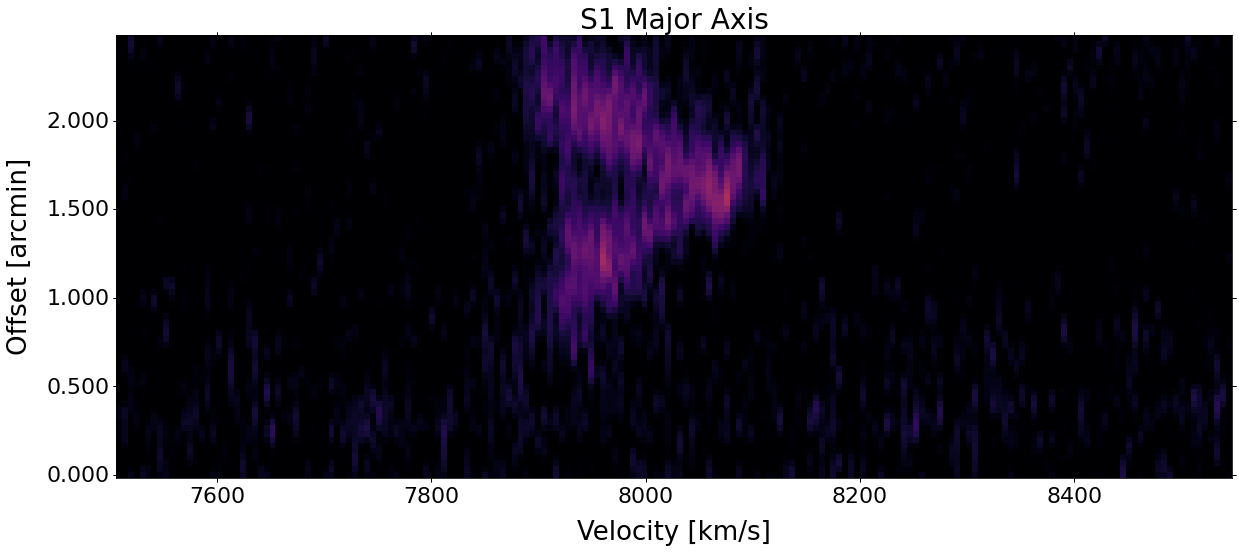

In [61]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pv2.data.T, cmap = 'inferno', vmin = -0.000, vmax = 0.008)
#cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')

ax.set_title('S1 Major Axis', fontsize=28)
ax0 = ax.coords[1]
ax0.set_format_unit(u.km/u.s)
ax0.set_ticklabel(fontsize=22)
ax1 = ax.coords[0]
ax1.set_format_unit(u.arcmin)
ax1.set_ticklabel(fontsize=22)
cb.set_label(cube.unit, fontsize = 22)
cb.ax.tick_params(labelsize = 22)
ax.set_xlabel("Velocity [km/s]", fontsize = 26 )
ax.set_ylabel("Offset [arcmin]", fontsize = 26 )
ax.invert_xaxis()


#lon = ax.coords[0]
#lon.set_ticks_visible(False)
#lon.set_ticklabel_visible(False)
#lon.set_axislabel('')

plt.savefig('S1hor.pdf', bbox_inches='tight')



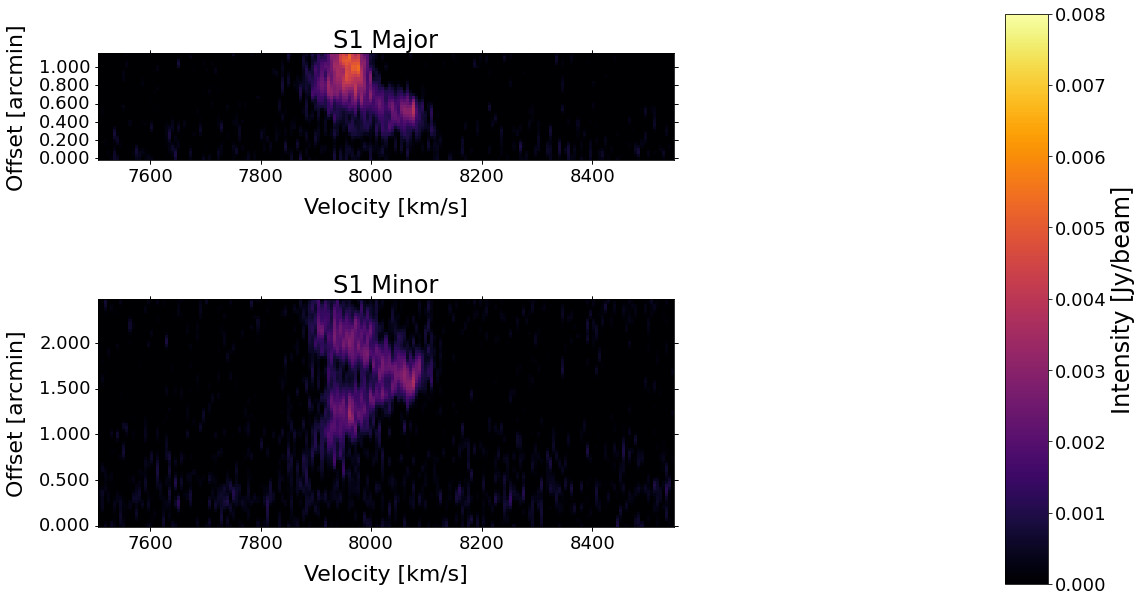

In [153]:
fig = plt.figure(figsize = (20,12))
ax1 = fig.add_subplot(211, projection=ww, slices=('y', 'x'))
im1 = ax1.imshow(pvdiagram.data.T, cmap = 'inferno', vmin = -0.000, vmax = 0.008)
ax1.set_title('S1 Major',size=24)
ax2 = fig.add_subplot(212, projection= ww, slices=('y', 'x'))
im2 = ax2.imshow(pv2.data.T, cmap = 'inferno', vmin = -0.000, vmax = 0.008)
ax2.set_title('S1 Minor',size=24)



#ax1.set_title('S1 Major Axis', fontsize=28)
ax10 = ax1.coords[1]
ax10.set_format_unit(u.km/u.s)
ax10.set_ticklabel(fontsize=18)
ax11 = ax1.coords[0]
ax11.set_format_unit(u.arcmin)
ax11.set_ticklabel(fontsize=18)
#cb.set_label(cube.unit, fontsize = 22)
#cb.ax.tick_params(labelsize = 22)
ax1.set_xlabel("Velocity [km/s]", fontsize = 22 )
ax1.set_ylabel("Offset [arcmin]", fontsize = 22 )
ax1.invert_xaxis()

#ax1.set_title('S1 Major Axis', fontsize=28)
ax20 = ax2.coords[1]
ax20.set_format_unit(u.km/u.s)
ax20.set_ticklabel(fontsize=18)
ax21 = ax2.coords[0]
ax21.set_format_unit(u.arcmin)
ax21.set_ticklabel(fontsize=18)
#cb.set_label(cube.unit, fontsize = 22)
#cb.ax.tick_params(labelsize = 22)
ax2.set_xlabel("Velocity [km/s]", fontsize = 22 )
ax2.set_ylabel("Offset [arcmin]", fontsize = 22 )
ax2.invert_xaxis()

plt.subplots_adjust(bottom=0.2, right=0.5, top=0.85, left = 0.1, wspace=0.0)

cbar_ax = fig.add_axes([0.73, 0.15, 0.03, 0.66])

cbar = plt.colorbar(im1, cax=cbar_ax)
cbar.set_label(r"Intensity [Jy/beam]", size=24)
#cbar.ax.set_yticklabels(['0.0','', '0.1','', '0.2','', '0.3','', '0.4'])
cbar.ax.tick_params(labelsize=18)
#plt.savefig('S1slices.pdf', bbox_inches='tight')

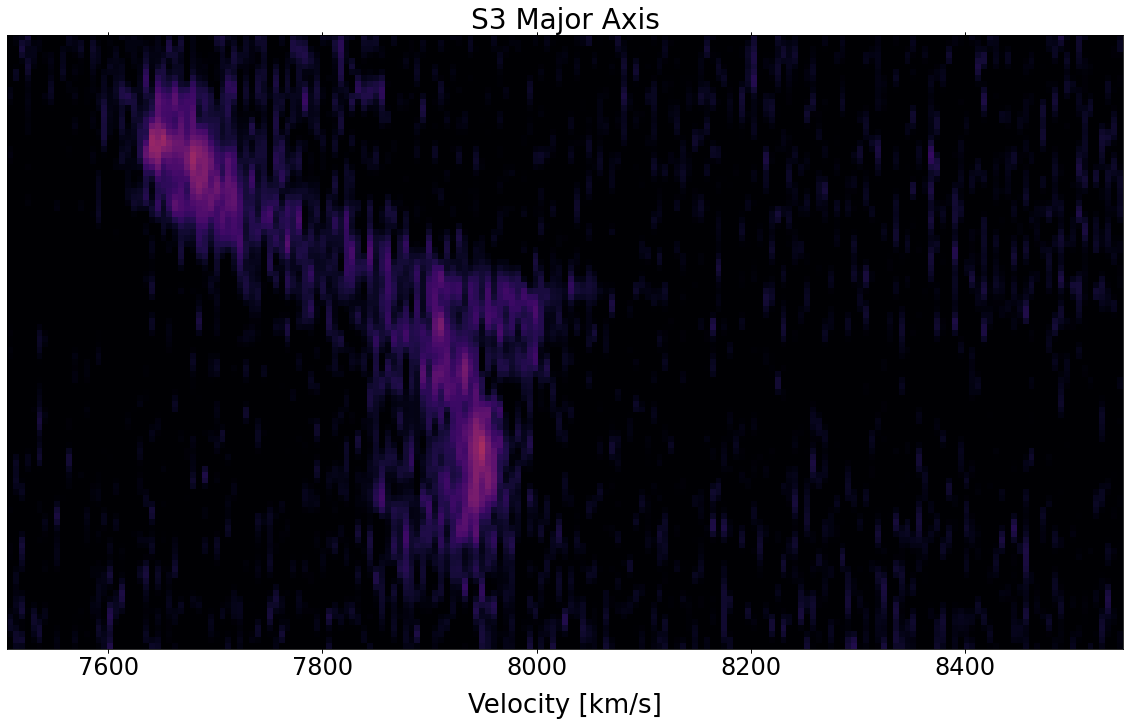

In [23]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pv3.data.T, cmap = 'inferno', vmin = -0.000, vmax = 0.008)
#cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')


ax.set_title('S3 Major Axis', fontsize=28)
ax0 = ax.coords[1]
ax0.set_format_unit(u.km/u.s)
ax0.set_ticklabel(fontsize=24)
ax1 = ax.coords[0]
ax1.set_format_unit(u.arcmin)
cb.set_label(cube.unit, fontsize = 18)
cb.ax.tick_params(labelsize=18)
ax.set_xlabel("Velocity [km/s]", fontsize = 26 )
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis()

lon = ax.coords[0]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lon.set_axislabel('')

#plt.savefig('S3horpost.pdf', bbox_inches='tight')

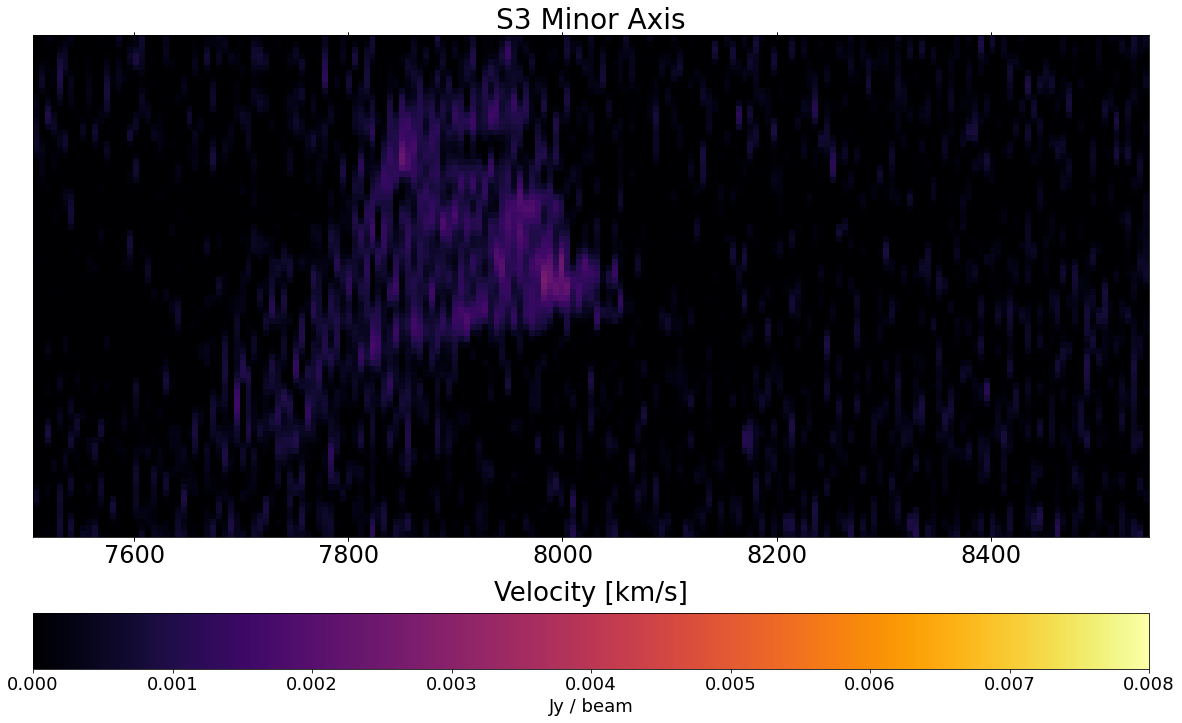

In [25]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pv4.data.T, cmap = 'inferno', vmin = -0.000, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')

ax.set_title('S3 Minor Axis', fontsize=28)
ax0 = ax.coords[1]
ax0.set_format_unit(u.km/u.s)
ax0.set_ticklabel(fontsize=24)
ax1 = ax.coords[0]
ax1.set_format_unit(u.arcmin)
cb.set_label(cube.unit, fontsize = 18)
cb.ax.tick_params(labelsize=18)
ax.set_xlabel("Velocity [km/s]", fontsize = 26 )
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis()

lon = ax.coords[0]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lon.set_axislabel('')
#plt.savefig('S3vertpost.pdf', bbox_inches='tight')

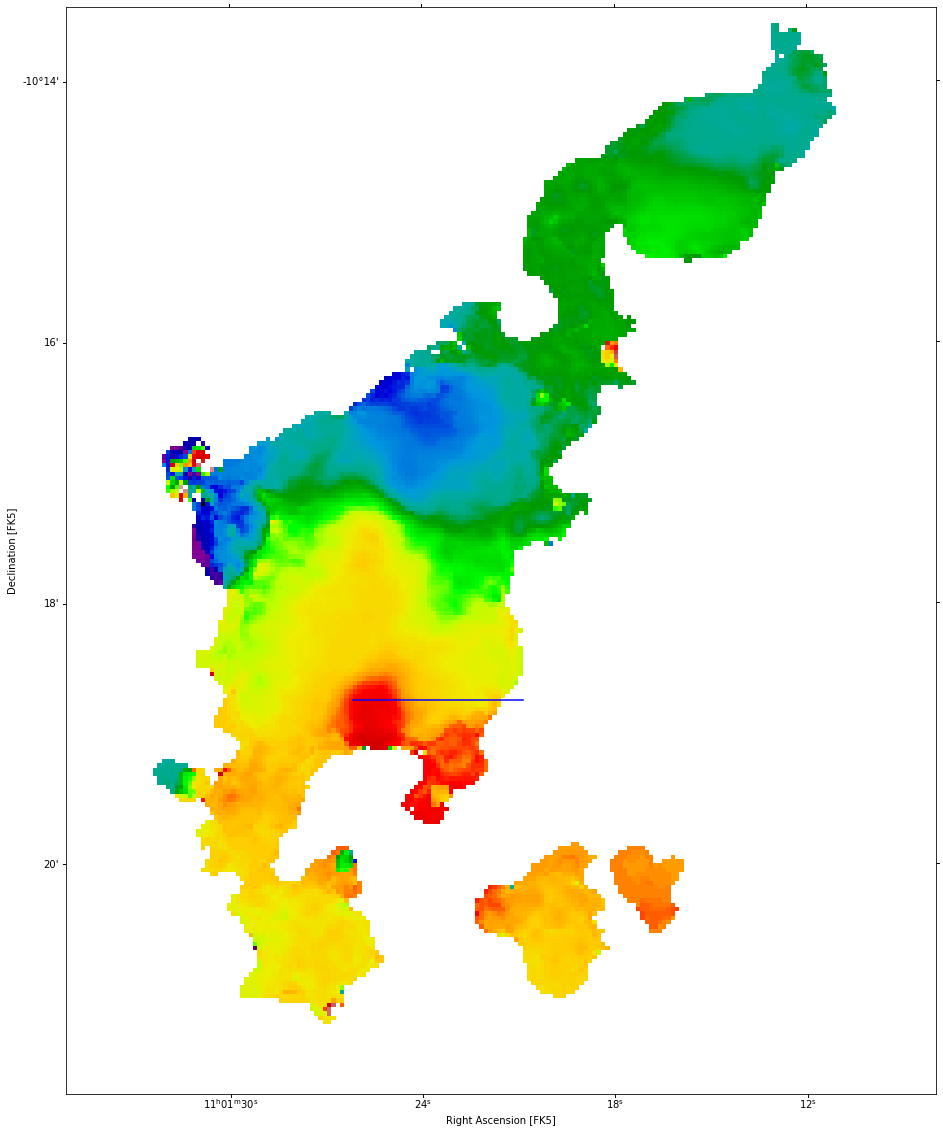

In [27]:
path = Path([(65,90),(105,90)])
#path2 = Path([(40,89),(100,189)])
#path3 = Path([(50,89),(110,189)])

plt.figure(figsize = (20,20))
ax = plt.subplot(111, projection=cube.wcs.celestial)

#ax.imshow(cube[153].value)
ax.imshow(data_mom1, cmap='nipy_spectral', vmin=7550, vmax=8100)
path.show_on_axis(ax, spacing=1, color='b')
#path2.show_on_axis(ax, spacing=1, color = 'r')
#path3.show_on_axis(ax, spacing=1, color = 'r')
#ax.plot(linex,liney,'b')
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")
#plt.savefig('S3vertmom1.pdf', bbox_inches='tight')

In [28]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
#pv2 = extract_pv_slice(cube=cube,path=path2, spacing =1)
#pv3 = extract_pv_slice(cube=cube, path =path3, spacing=1)
#pvdiagram.data[0,:]
pvdiagram.shape
pvcopy = pvdiagram.data[80:130,:]

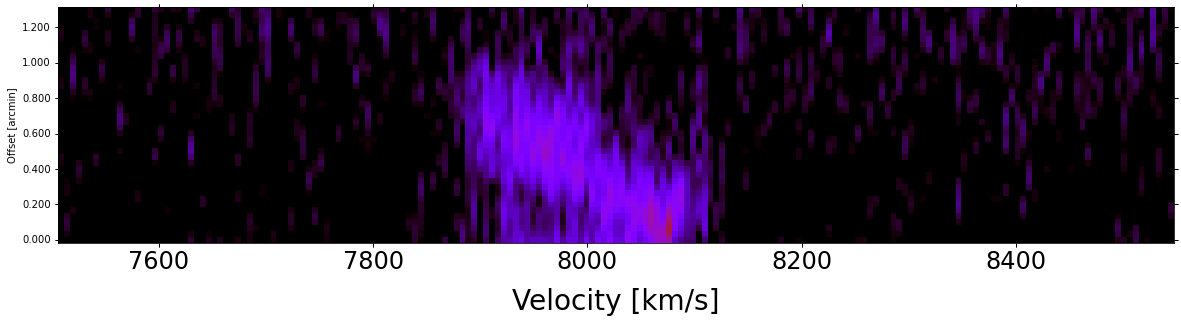

In [29]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram.data.T, cmap = 'gnuplot', vmin = 0.000, vmax = 0.008)
#cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(0.5)

ax0 = ax.coords[1]
ax0.set_format_unit(u.km/u.s)
ax0.set_ticklabel(fontsize=24)
ax1 = ax.coords[0]
ax1.set_format_unit(u.arcmin)
#cb.set_label(cube.unit, fontsize = 18)
#cb.ax.tick_params(labelsize=18)
ax.set_xlabel("Velocity [km/s]", fontsize = 28 )
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis()
#plt.savefig('S1majpost.pdf', bbox_inches='tight')

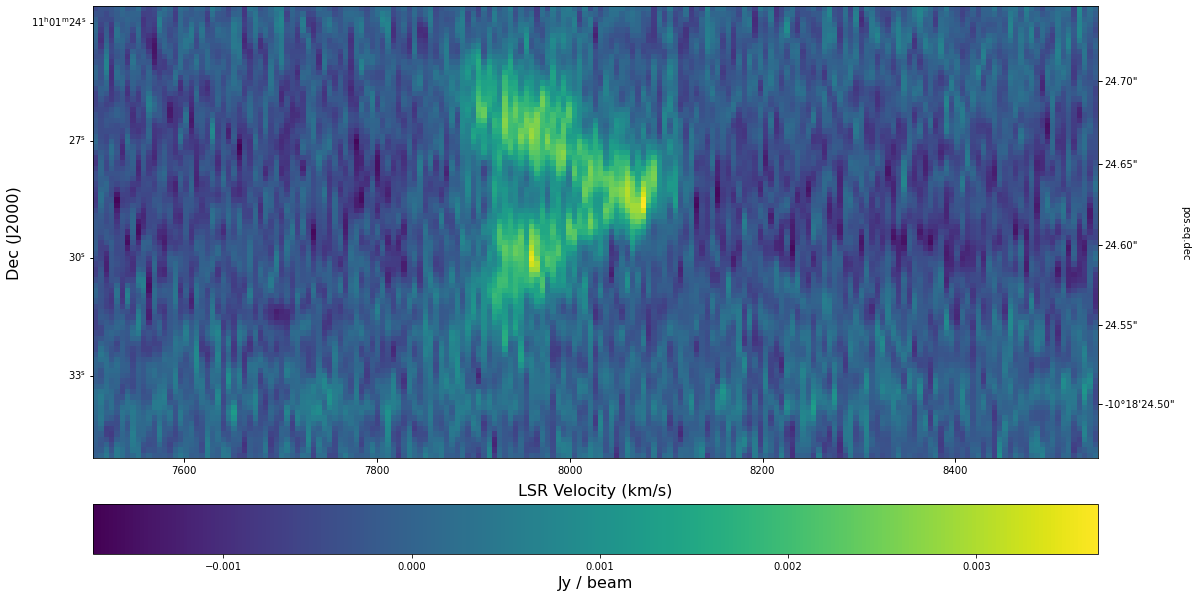

In [30]:
lat_slice = 100 # Index of latitude dimension to slice along
sub_cube = cube[:, :, 20:105]  
# Initiate a figure and axis object with WCS projection information
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection=cube.wcs, slices=('y', lat_slice, 'x'))
# Above, we have specified to plot the longitude along the y axis, pick only the lat_slice 
# indicated, and plot the velocity along the x axis

# Display the slice
im = ax.imshow(sub_cube[:, 90, :].transpose().data)  # Display the image slice
ax.invert_xaxis()  # Flips the Y axis 


ax2 = ax.coords[2]
ax2.set_format_unit(u.km/u.s)

# Add axes labels
ax.set_xlabel("LSR Velocity (km/s)", fontsize=16)
ax.set_ylabel("Dec (J2000)", fontsize=16)

# Add a colorbar
cbar = plt.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label(cube.unit, size=16)
#plt.savefig('S1hor.pdf', bbox_inches='tight')

In [102]:
path = Path([(45,89),(105,189)])
path2 = Path([(40,89),(100,189)])
path3 = Path([(45,81),(99,171)])
#y        x
#995  979
#1044 1061
m = (189-89)/(110-50)
c = 189 - m*110
f = lambda a, b, x: np.round(a * x+b)
print(f(m,c, 94))
linex = np.arange(100)*(60/100)+45
liney = f(m,c,linex)
print(linex)
print(liney)

162.0
[ 45.   45.6  46.2  46.8  47.4  48.   48.6  49.2  49.8  50.4  51.   51.6
  52.2  52.8  53.4  54.   54.6  55.2  55.8  56.4  57.   57.6  58.2  58.8
  59.4  60.   60.6  61.2  61.8  62.4  63.   63.6  64.2  64.8  65.4  66.
  66.6  67.2  67.8  68.4  69.   69.6  70.2  70.8  71.4  72.   72.6  73.2
  73.8  74.4  75.   75.6  76.2  76.8  77.4  78.   78.6  79.2  79.8  80.4
  81.   81.6  82.2  82.8  83.4  84.   84.6  85.2  85.8  86.4  87.   87.6
  88.2  88.8  89.4  90.   90.6  91.2  91.8  92.4  93.   93.6  94.2  94.8
  95.4  96.   96.6  97.2  97.8  98.4  99.   99.6 100.2 100.8 101.4 102.
 102.6 103.2 103.8 104.4]
[ 81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.
  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108.
 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122.
 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136.
 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150.
 151. 152. 153. 154. 155. 156. 

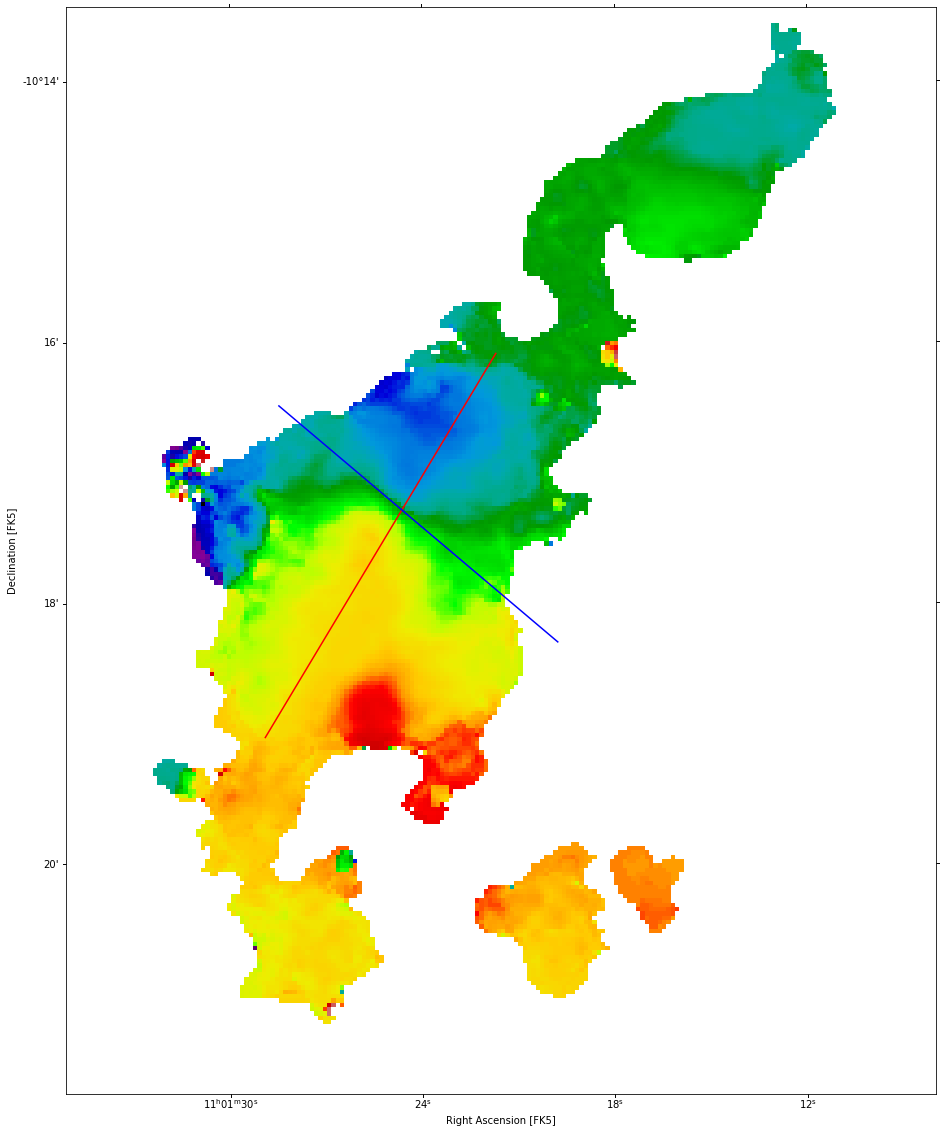

In [103]:
plt.figure(figsize = (20,20))
path3 = Path([(45,81),(99,171)])
path4 = Path([(48, 158),(113,103)])
ax = plt.subplot(111, projection=cube.wcs.celestial)




ax.imshow(data_mom1, cmap='nipy_spectral', vmin=7550, vmax=8100)
#path.show_on_axis(ax, spacing=1, color ='g')
#path2.show_on_axis(ax, spacing=1, color ='b')
path3.show_on_axis(ax, spacing=1, color = 'r')
path4.show_on_axis(ax, spacing=1, color = 'b')
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")
plt.savefig('S3mom1.pdf', bbox_inches='tight')

In [104]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
pv2 = extract_pv_slice(cube=cube,path=path2, spacing =1)
s3maj = extract_pv_slice(cube=cube, path =path3, spacing=1)
pvdiagram

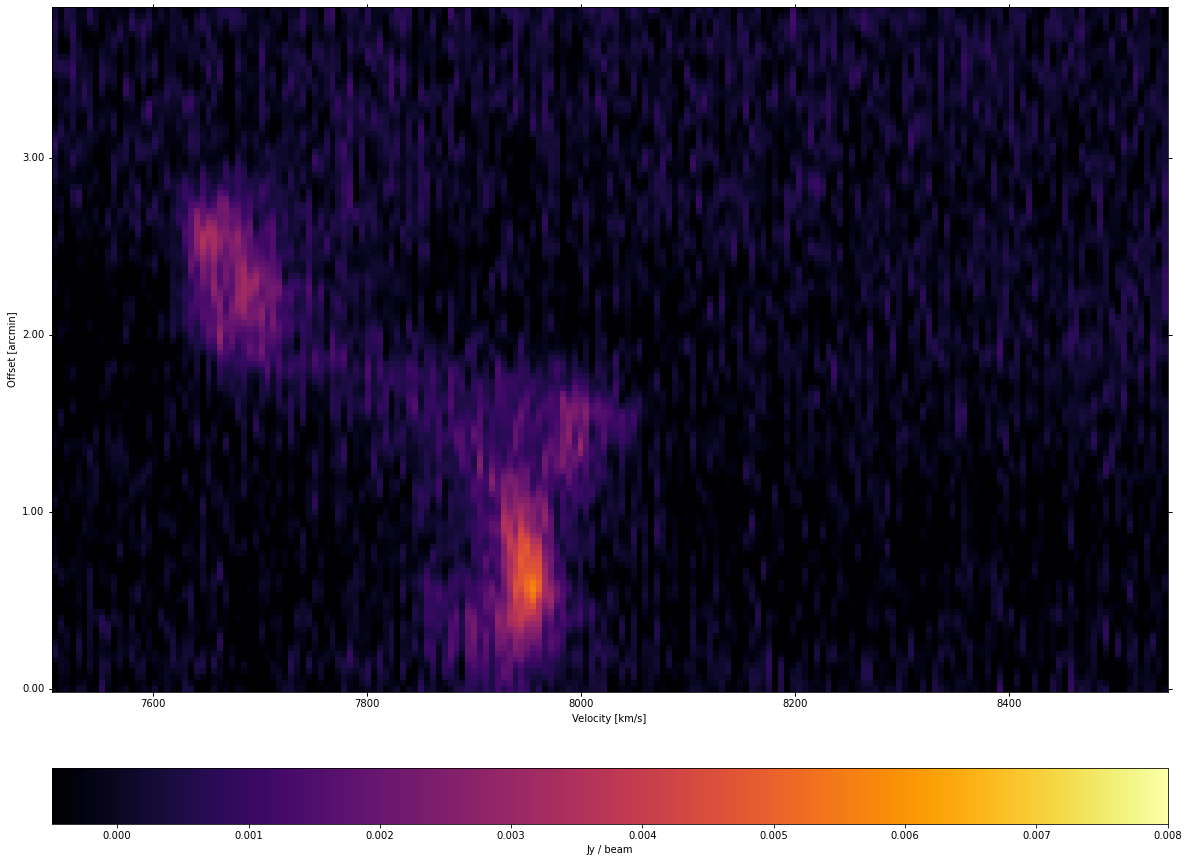

In [34]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis()  # Flips the Y axis 
#plt.savefig('S3vertp1.pdf', bbox_inches='tight')

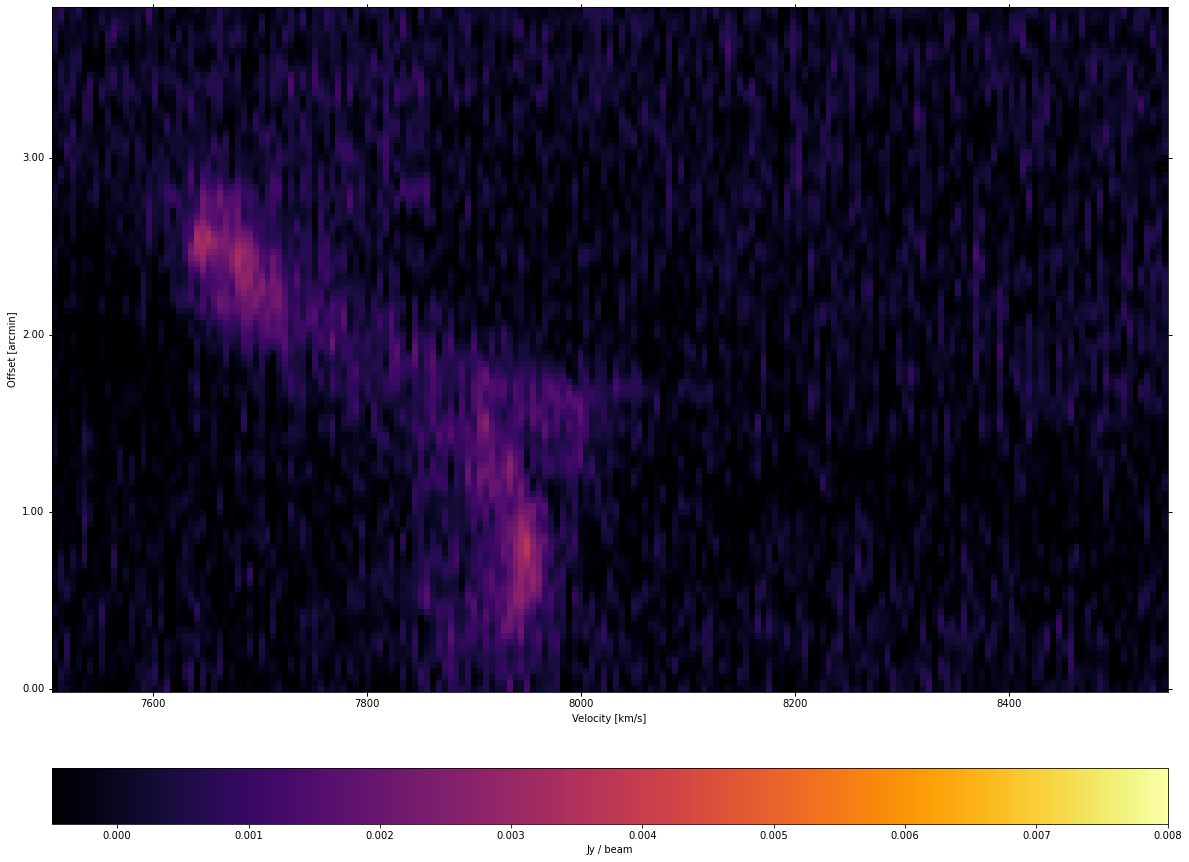

In [35]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pv2.data.T, cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3vertp2.pdf', bbox_inches='tight')

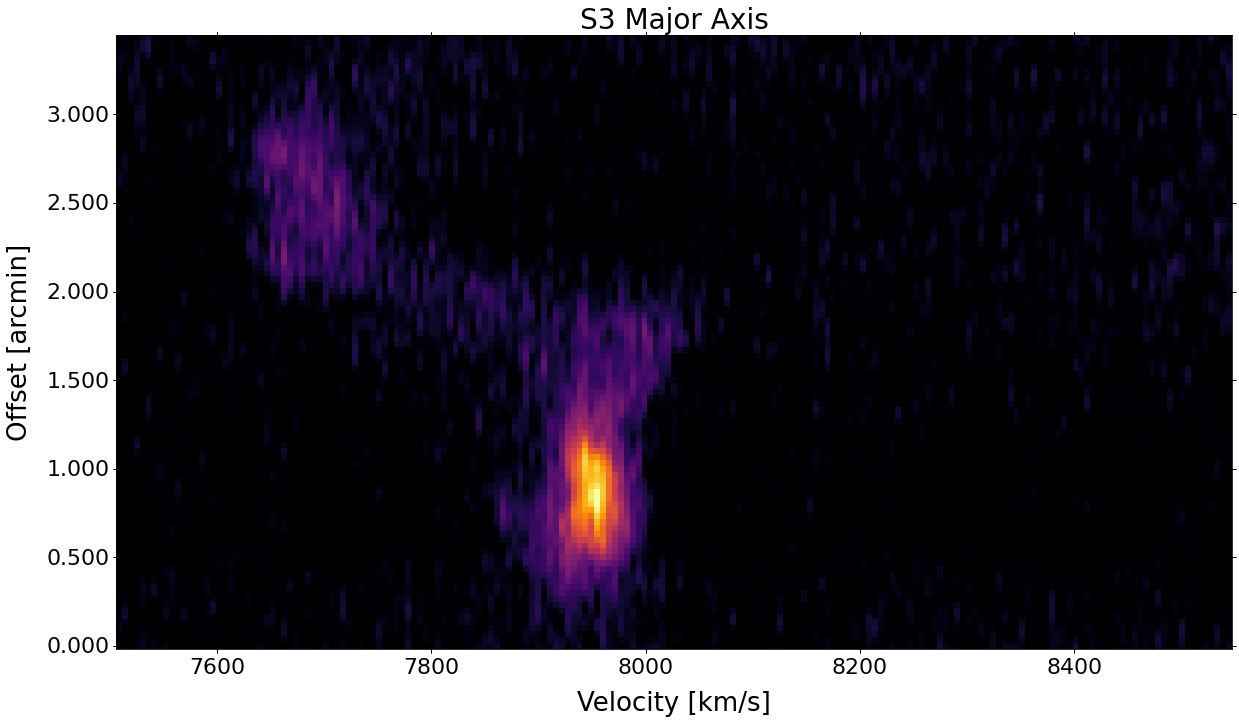

In [54]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pv3.data.T,cmap = 'inferno', vmin = -0.000, vmax = 0.008)
#cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax.set_title('S3 Major Axis', fontsize=28)
ax0 = ax.coords[1]
ax0.set_format_unit(u.km/u.s)
ax0.set_ticklabel(fontsize=22)
ax1 = ax.coords[0]
ax1.set_format_unit(u.arcmin)
ax1.set_ticklabel(fontsize=22)
cb.set_label(cube.unit, fontsize = 22)
cb.ax.tick_params(labelsize = 22)
ax.set_xlabel("Velocity [km/s]", fontsize = 26 )
ax.set_ylabel("Offset [arcmin]", fontsize = 26 )
ax.invert_xaxis()


plt.savefig('S3vert.pdf', bbox_inches='tight')

In [105]:
path = Path([(54,164),(119,109)])
path2 = Path([(48, 158),(113,103)])
path3 = Path([(42,152),(107,97)])
path4 = Path([(50, 138),(69,140),(80,131), (85,131), (90,127),(113,140)])
#y        x
#950  890
#989  1059
#1054 1004

# 995 1065
#1060 1010

m = (103-158)/(113-48)
c = 158 - m*48
f = lambda a, b, x: a * x+b
print(f(m,c, 94))
linex = np.arange(65) + 48
liney = f(m,c,linex)
print(linex)
print(liney)

119.07692307692308
[ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112]
[158.         157.15384615 156.30769231 155.46153846 154.61538462
 153.76923077 152.92307692 152.07692308 151.23076923 150.38461538
 149.53846154 148.69230769 147.84615385 147.         146.15384615
 145.30769231 144.46153846 143.61538462 142.76923077 141.92307692
 141.07692308 140.23076923 139.38461538 138.53846154 137.69230769
 136.84615385 136.         135.15384615 134.30769231 133.46153846
 132.61538462 131.76923077 130.92307692 130.07692308 129.23076923
 128.38461538 127.53846154 126.69230769 125.84615385 125.
 124.15384615 123.30769231 122.46153846 121.61538462 120.76923077
 119.92307692 119.07692308 118.23076923 117.38461538 116.53846154
 115.69230769 114.84615385 114.         113.15384615 112.3076923

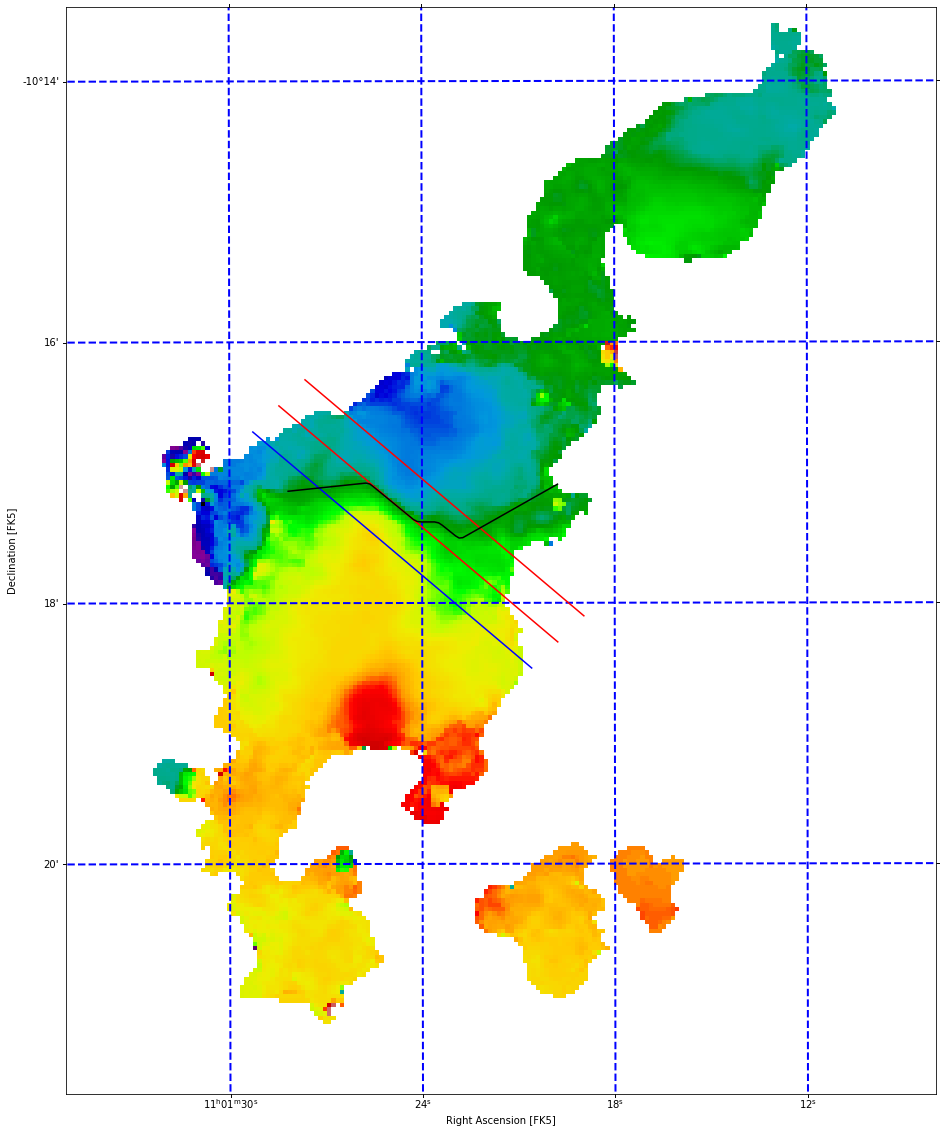

In [106]:
plt.figure(figsize = (20,20))
ax = plt.subplot(111, projection=cube.wcs.celestial)
#ax.imshow(cube[153].value)
ax.imshow(data_mom1, cmap='nipy_spectral', vmin=7550, vmax=8100)
#ax.colorbar()
path.show_on_axis(ax, spacing=1, color='r')
path2.show_on_axis(ax, spacing=1, color = 'r')
path3.show_on_axis(ax, spacing=1, color = 'b')
#ax.plot(linex,liney,'m')
path4.show_on_axis(ax, spacing=1, color = 'k')
ax.grid(color='b', linestyle='--', linewidth=2)
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")
#lt.savefig('S3hormom1.pdf', bbox_inches='tight')

In [107]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
s3min = extract_pv_slice(cube=cube, path=path2, spacing=1)
pvdiagram3 = extract_pv_slice(cube=cube, path=path3, spacing=1)
pvdiagram4 = extract_pv_slice(cube=cube, path=path4, spacing=1)

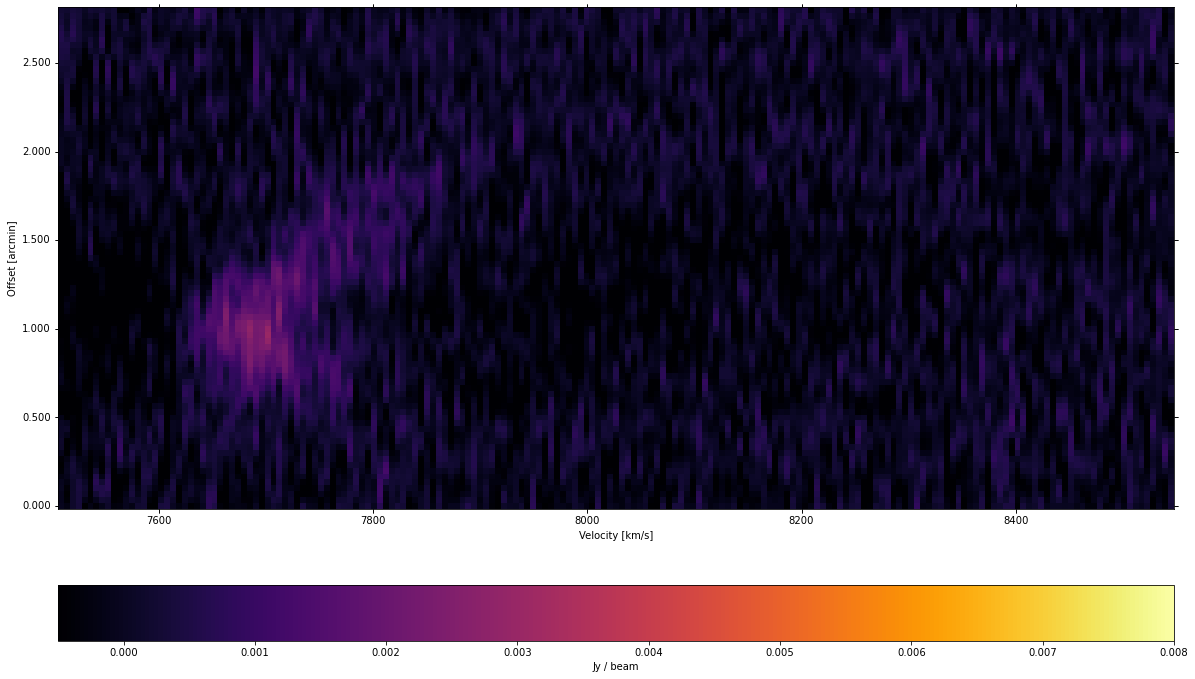

In [42]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3horp1.pdf', bbox_inches='tight')

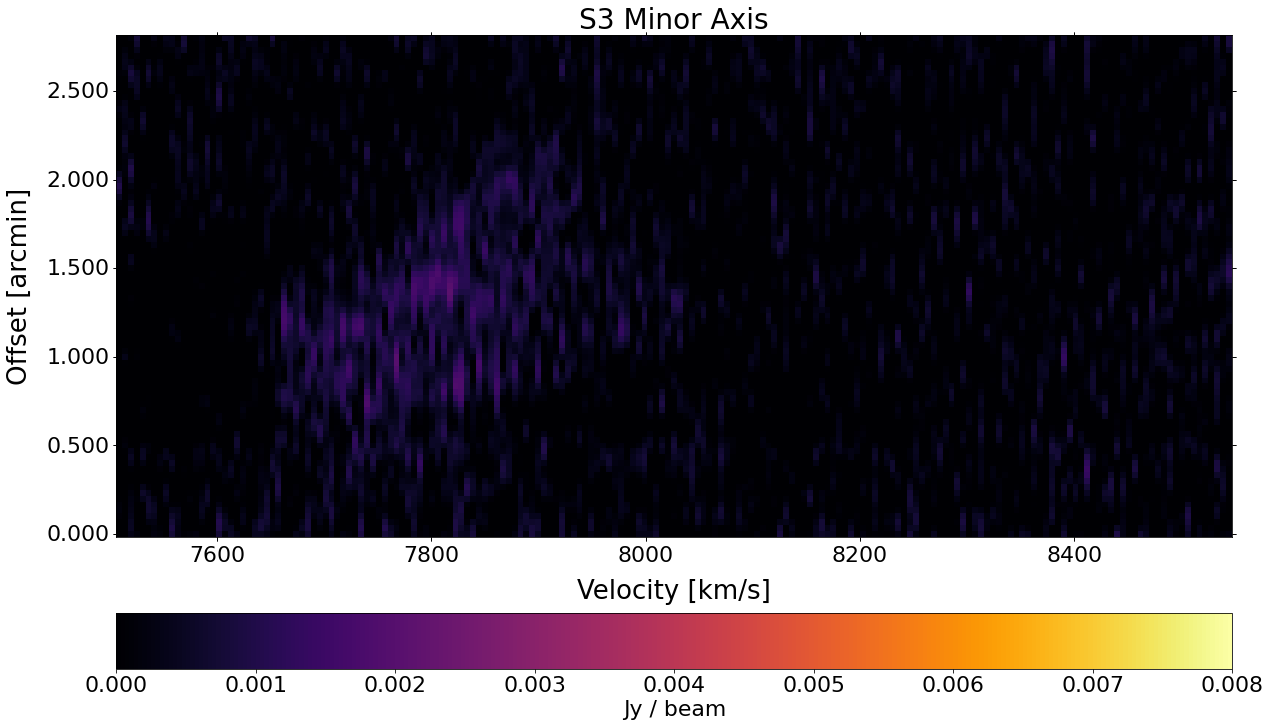

In [58]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram2.data.T,cmap = 'inferno', vmin = -0.000, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)



ax.set_title('S3 Minor Axis', fontsize=28)
ax0 = ax.coords[1]
ax0.set_format_unit(u.km/u.s)
ax0.set_ticklabel(fontsize=22)
ax1 = ax.coords[0]
ax1.set_format_unit(u.arcmin)
ax1.set_ticklabel(fontsize=22)
cb.set_label(cube.unit, fontsize = 22)
cb.ax.tick_params(labelsize = 22)
ax.set_xlabel("Velocity [km/s]", fontsize = 26 )
ax.set_ylabel("Offset [arcmin]", fontsize = 26 )
ax.invert_xaxis()


plt.savefig('S3hor.pdf', bbox_inches='tight')

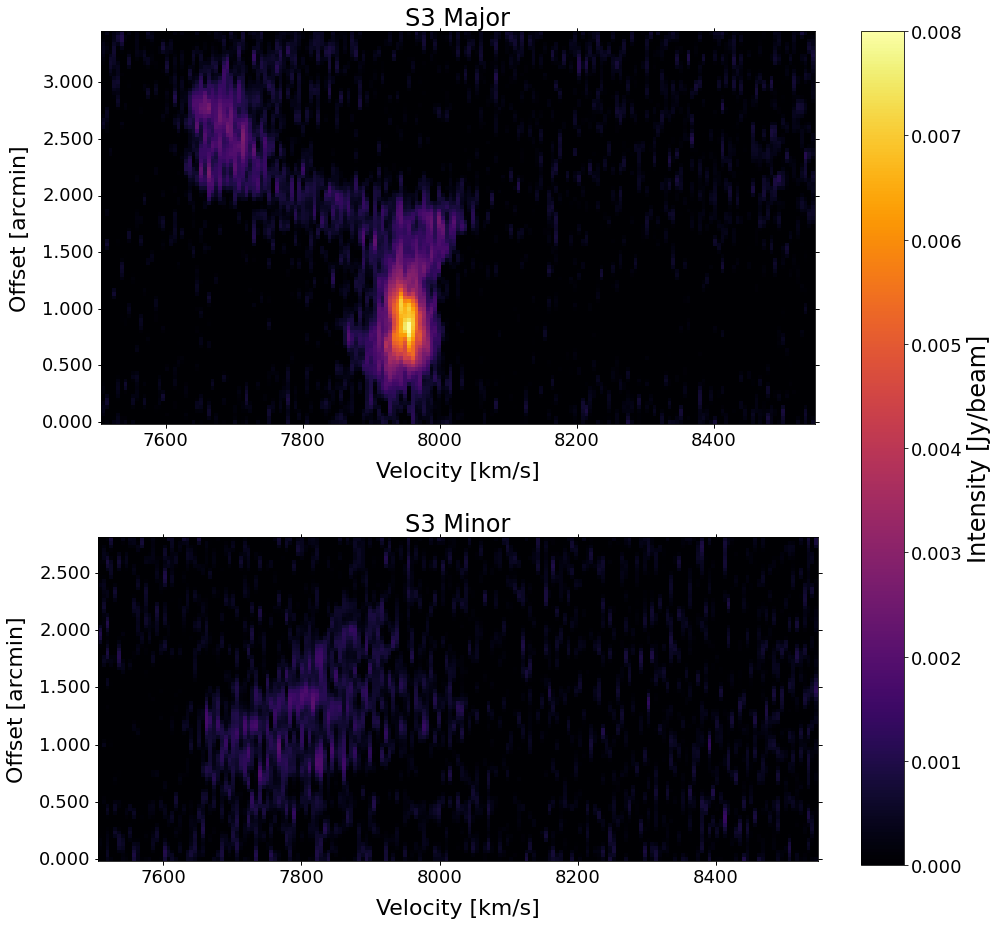

In [140]:
fig = plt.figure(figsize = (20,12))
ax1 = fig.add_subplot(211, projection=ww, slices=('y', 'x'))
im1 = ax1.imshow(s3maj.data.T, cmap = 'inferno', vmin = -0.000, vmax = 0.008)
ax1.set_title('S3 Major',size=24)
ax2 = fig.add_subplot(212, projection= ww, slices=('y', 'x'))
im2 = ax2.imshow(s3min.data.T, cmap = 'inferno', vmin = -0.000, vmax = 0.008)
ax2.set_title('S3 Minor',size=24)



#ax1.set_title('S1 Major Axis', fontsize=28)
ax10 = ax1.coords[1]
ax10.set_format_unit(u.km/u.s)
ax10.set_ticklabel(fontsize=18)
ax11 = ax1.coords[0]
ax11.set_format_unit(u.arcmin)
ax11.set_ticklabel(fontsize=18)
#cb.set_label(cube.unit, fontsize = 22)
#cb.ax.tick_params(labelsize = 22)
ax1.set_xlabel("Velocity [km/s]", fontsize = 22 )
ax1.set_ylabel("Offset [arcmin]", fontsize = 22 )
ax1.invert_xaxis()

#ax1.set_title('S1 Major Axis', fontsize=28)
ax20 = ax2.coords[1]
ax20.set_format_unit(u.km/u.s)
ax20.set_ticklabel(fontsize=18)
ax21 = ax2.coords[0]
ax21.set_format_unit(u.arcmin)
ax21.set_ticklabel(fontsize=18)
#cb.set_label(cube.unit, fontsize = 22)
#cb.ax.tick_params(labelsize = 22)
ax2.set_xlabel("Velocity [km/s]", fontsize = 22 )
ax2.set_ylabel("Offset [arcmin]", fontsize = 22 )
ax2.invert_xaxis()

plt.subplots_adjust(bottom=0.0, right=0.5, top=1.0, left = 0.0, wspace=0.0)

cbar_ax = fig.add_axes([0.53, 0.035, 0.03, 0.965])

cbar = plt.colorbar(im1, cax=cbar_ax)
cbar.set_label(r"Intensity [Jy/beam]", size=24)
#cbar.ax.set_yticklabels(['0.0','', '0.1','', '0.2','', '0.3','', '0.4'])
cbar.ax.tick_params(labelsize=18)
plt.savefig('S3slices.pdf', bbox_inches='tight')

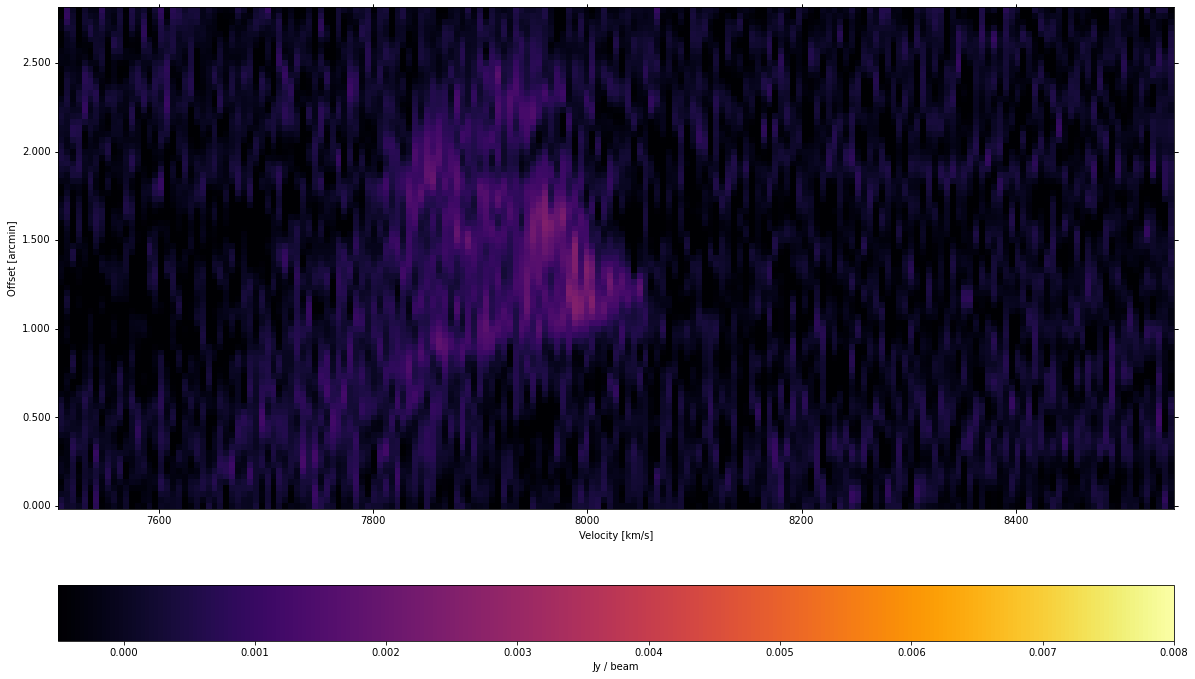

In [480]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram3.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3horp3.pdf', bbox_inches='tight')

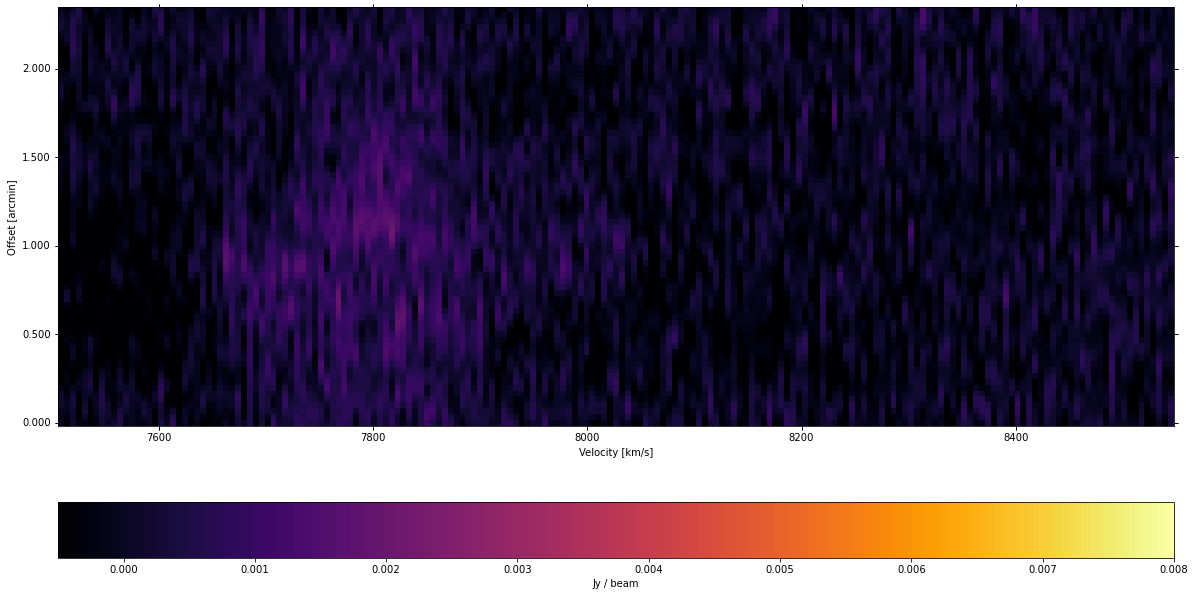

In [481]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram4.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3horp1.pdf', bbox_inches='tight')

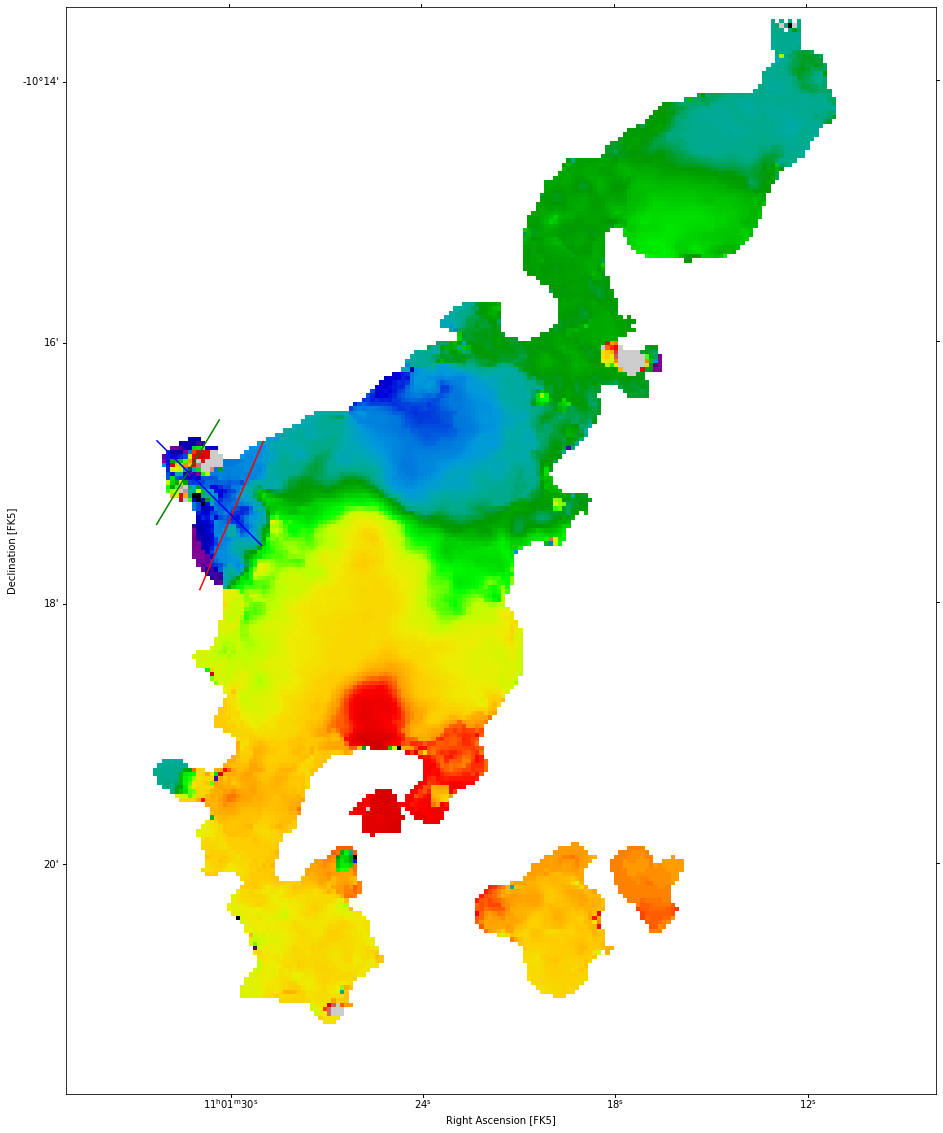

In [581]:
path = Path([(30,115),(45,150)])
path2 = Path([(20,130),(35,155)])
path3 = Path([(20,150),(45,125)])

plt.figure(figsize = (20,20))
ax = plt.subplot(111, projection=cube.wcs.celestial)
ax.imshow(data_mom1, cmap='nipy_spectral', vmin=7550, vmax=8100)
path.show_on_axis(ax, spacing=1, color='r')
path2.show_on_axis(ax, spacing=1, color='g')
path3.show_on_axis(ax, spacing=1, color='b')
#ax.grid(color='b', linestyle='--', linewidth=2)
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")

In [582]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
pvdiagram2 = extract_pv_slice(cube=cube, path=path2, spacing=1)
pvdiagram3 = extract_pv_slice(cube=cube, path=path3, spacing=1)

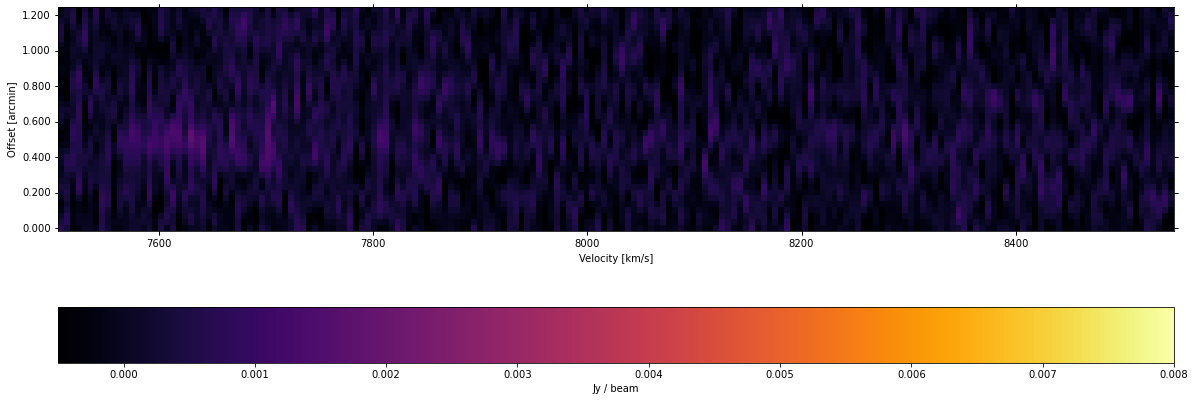

In [596]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3horp1.pdf', bbox_inches='tight')


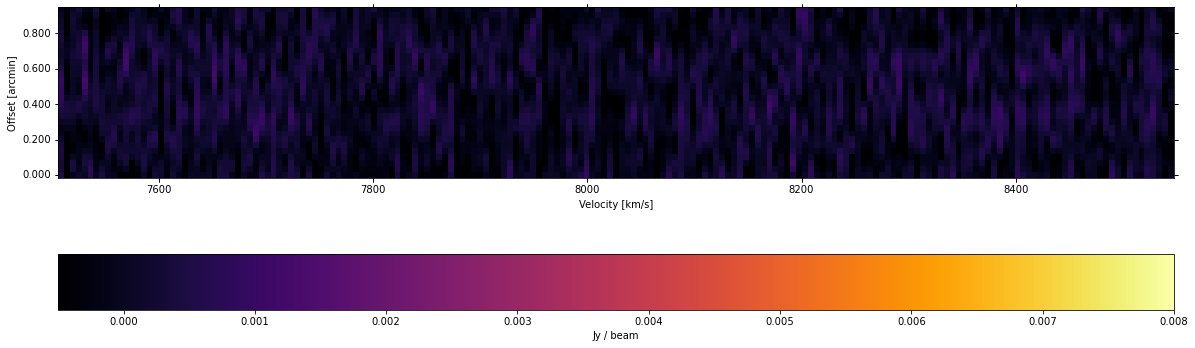

In [597]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram2.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3horp1.pdf', bbox_inches='tight')


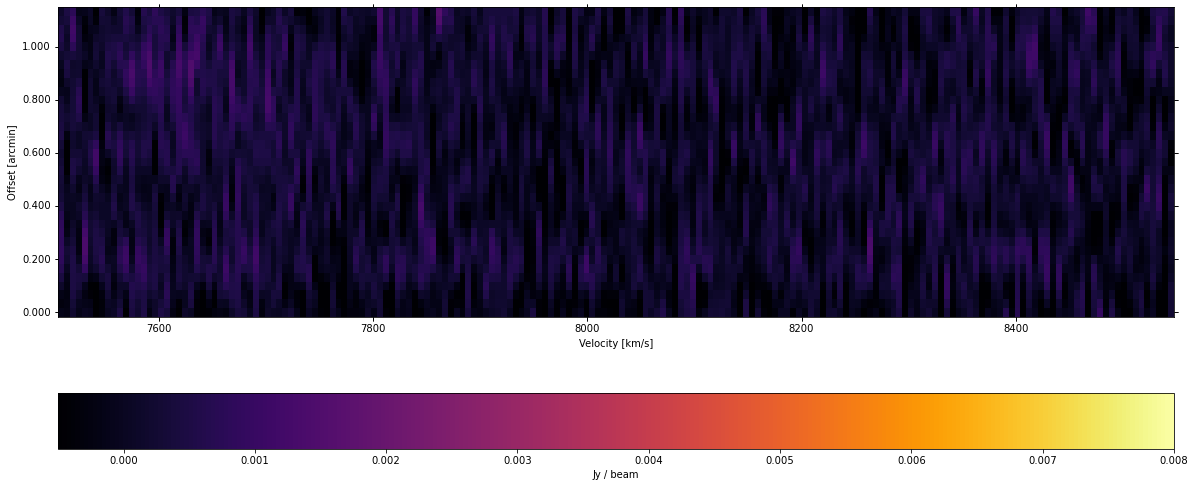

In [598]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram3.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3horp1.pdf', bbox_inches='tight')


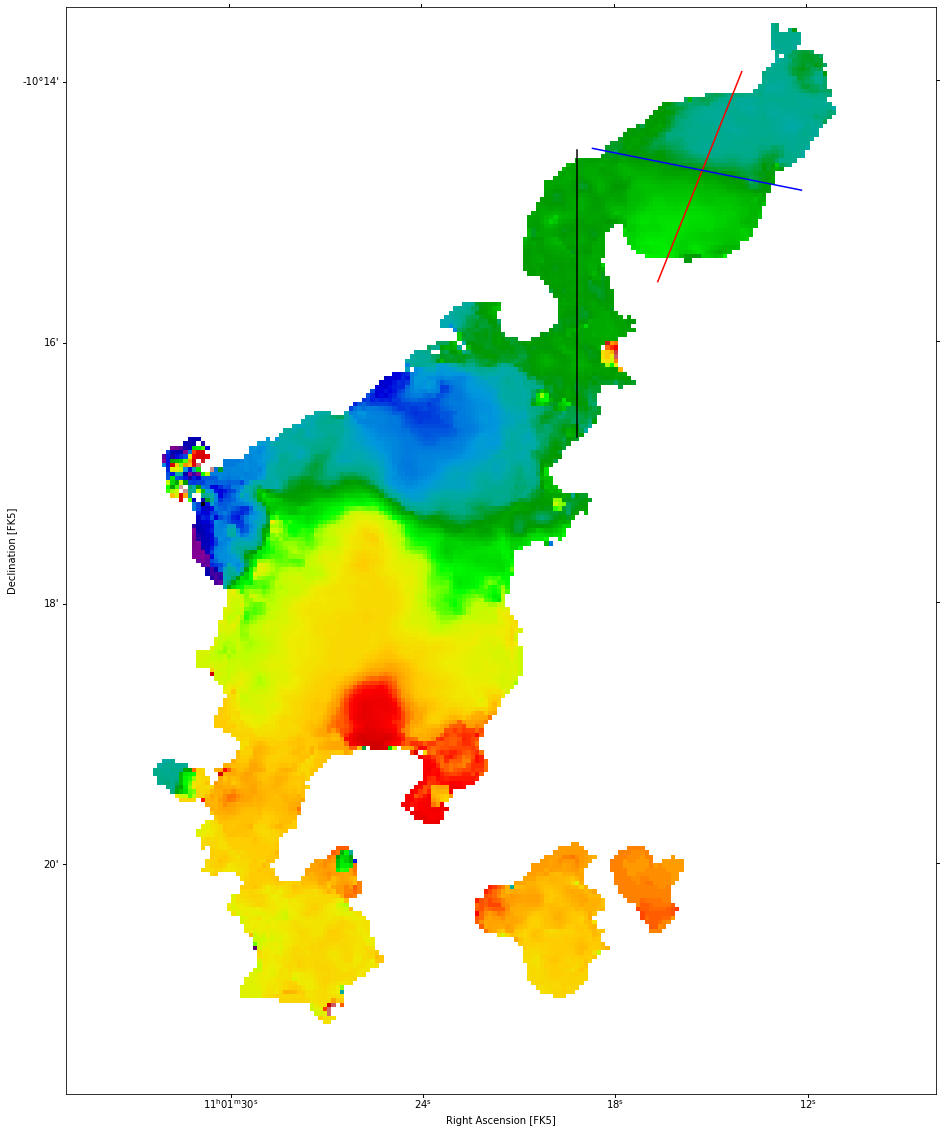

In [20]:
path = Path([(155,235),(135,185)])
path2 = Path([(120,217),(170,207)])
path3 = Path([(117,217),(117,150)])
plt.figure(figsize = (20,20))
ax = plt.subplot(111, projection=cube.wcs.celestial)
#ax.imshow(cube[153].value)
ax.imshow(data_mom1, cmap='nipy_spectral', vmin=7550, vmax=8100)
#ax.colorbar()
path.show_on_axis(ax, spacing=1, color='r')
path2.show_on_axis(ax, spacing=1, color='b')
path3.show_on_axis(ax, spacing=1, color='k')
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")
#plt.savefig('S2mom1.pdf', bbox_inches='tight')

In [21]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
pvdiagram2 = extract_pv_slice(cube=cube, path=path2, spacing=1)
pvdiagram3 = extract_pv_slice(cube=cube, path=path3, spacing=1)

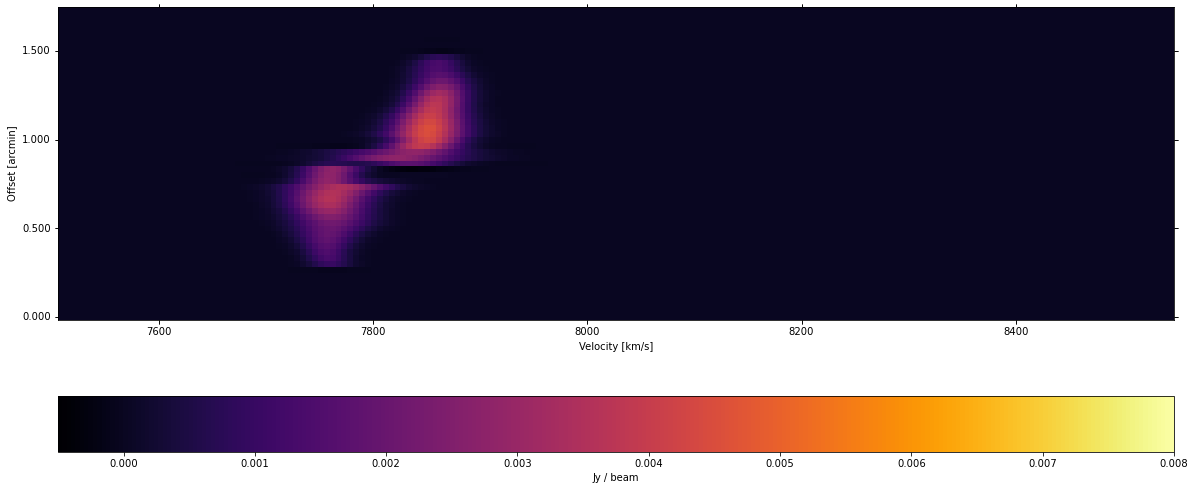

In [22]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3horp1.pdf', bbox_inches='tight')


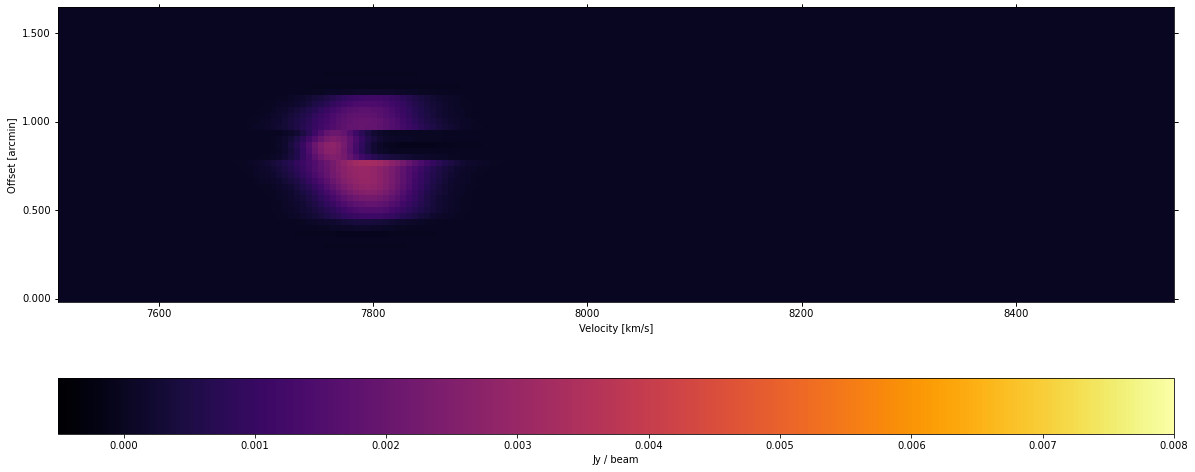

In [23]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram2.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3horp1.pdf', bbox_inches='tight')

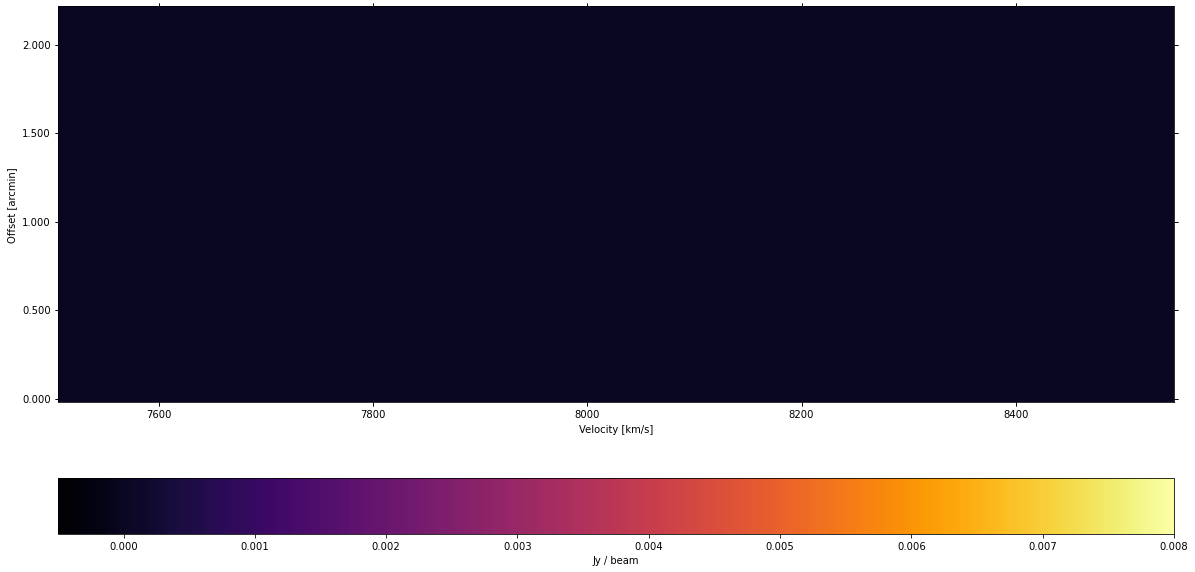

In [24]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram3.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S3horp1.pdf', bbox_inches='tight')

In [603]:
loc = 'data/'
vers = 'pbcorr' 
name= '_J1059_09_HI.image'
fullname = loc+vers+name
ext = '.fits'
image = '_S4'
mom1 = '_mom1'
outloc = loc+ 'plots/' +vers+name
optname = '_highresoptical'
imagename = fullname+image+ext
mom1name = fullname+mom1+image+ext
optfile = fullname+optname+image+ext
hdu_list = fits.open(imagename)
hdu0_list = fits.open(mom1name)
#hdu2_list = fits.open(optfile)
cube = SpectralCube.read(hdu_list)
data_mom1 = fits.getdata(mom1name)
header_mom1 = fits.getheader(mom1name)
#data_opt = fits.getdata(optfile)
#header_opt = fits.getheader(optfile)
print(cube)
image_data = hdu_list[0].data
print(type(image_data))
print(image_data.shape)

SpectralCube with shape=(189, 70, 80) and unit=Jy / beam:
 n_x:     80  type_x: RA---SIN  unit_x: deg    range:   165.351356 deg:  165.396040 deg
 n_y:     70  type_y: DEC--SIN  unit_y: deg    range:   -10.362427 deg:  -10.324019 deg
 n_s:    189  type_s: VRAD      unit_s: km / s  range:  7508465.359 km / s: 8544933.433 km / s
<class 'numpy.ndarray'>
(189, 70, 80)


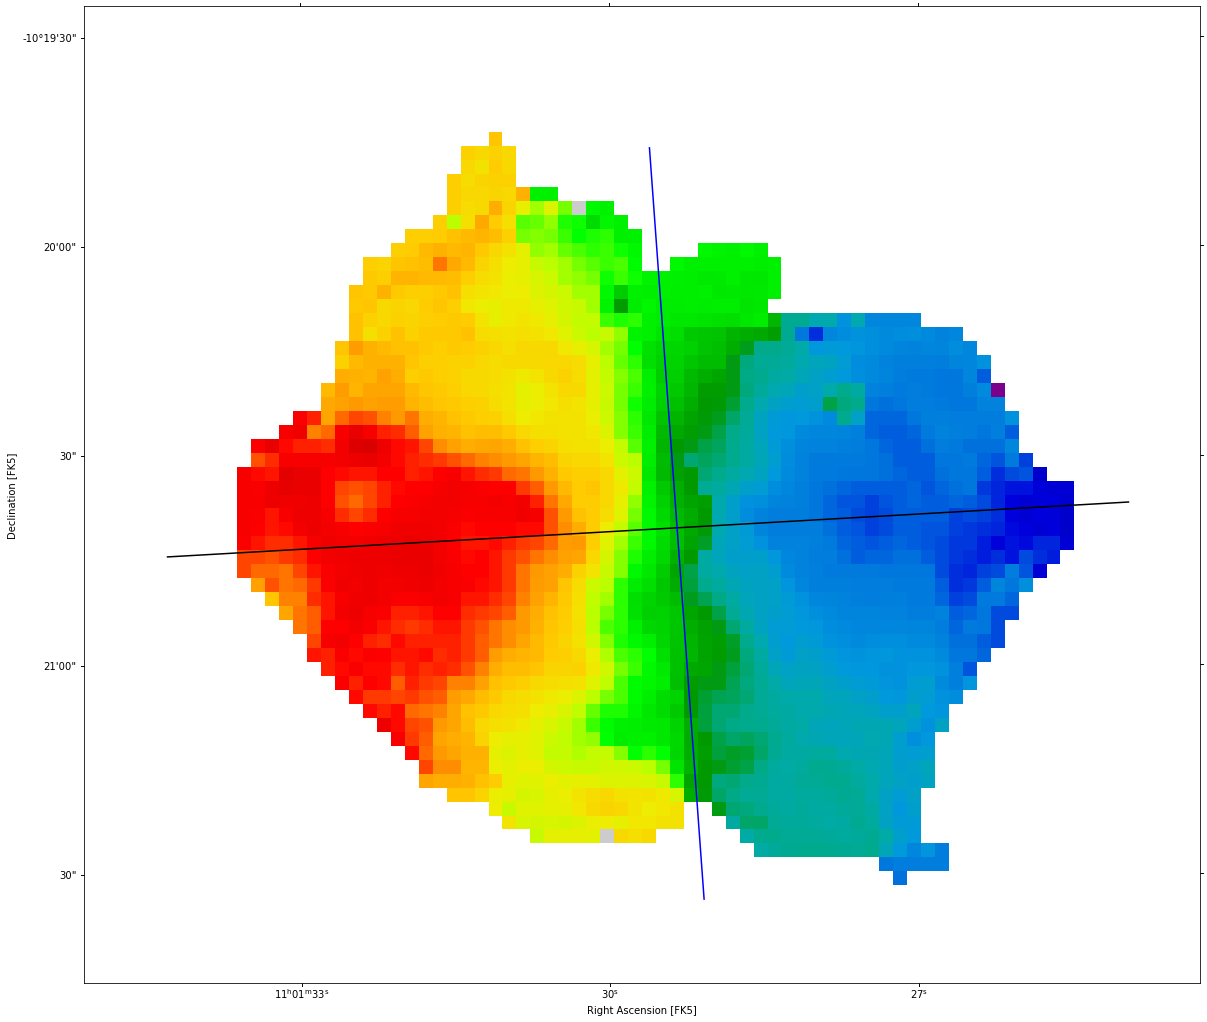

In [638]:
path = Path([(5,30),(75,34)])
path2 = Path([(44,5),(40,60)])


plt.figure(figsize = (20,20))
ax = plt.subplot(111, projection= wcs.WCS(header_mom1))

ax.imshow(data_mom1, cmap='nipy_spectral', vmin=7900, vmax=8300)
path.show_on_axis(ax, spacing=1, color ='k')
path2.show_on_axis(ax, spacing=1, color ='b')
#path3.show_on_axis(ax, spacing=1)
#path4.show_on_axis(ax, spacing=1)

ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")
plt.savefig('S4mom1.pdf', bbox_inches='tight')

In [639]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
pvdiagram2 = extract_pv_slice(cube=cube, path=path2, spacing=1)

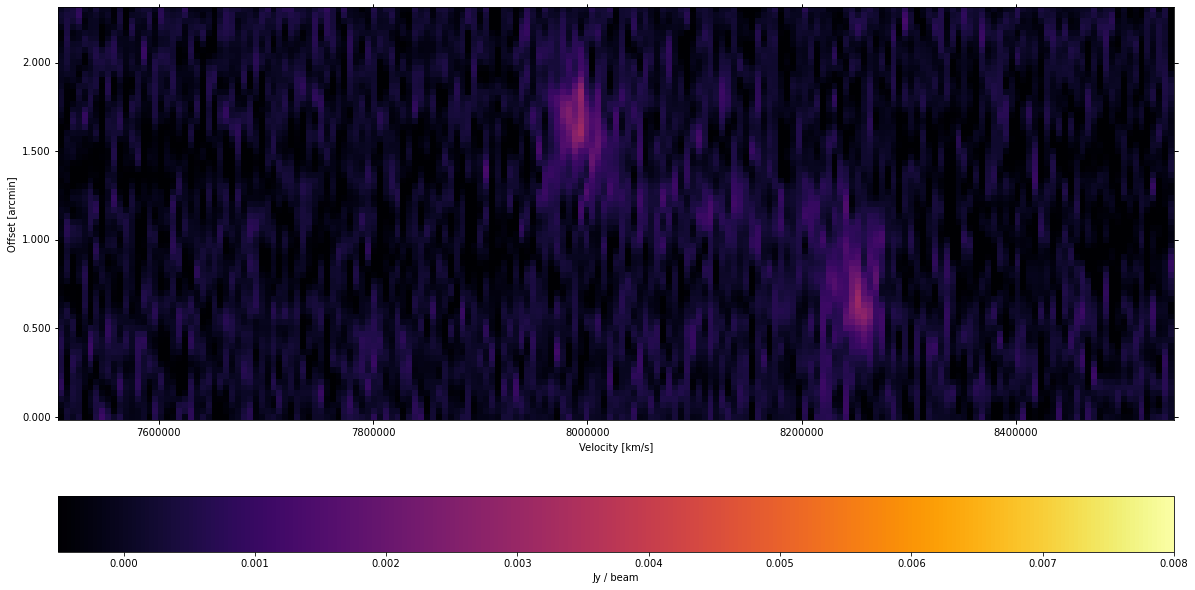

In [640]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
plt.savefig('S4rot.pdf', bbox_inches='tight')

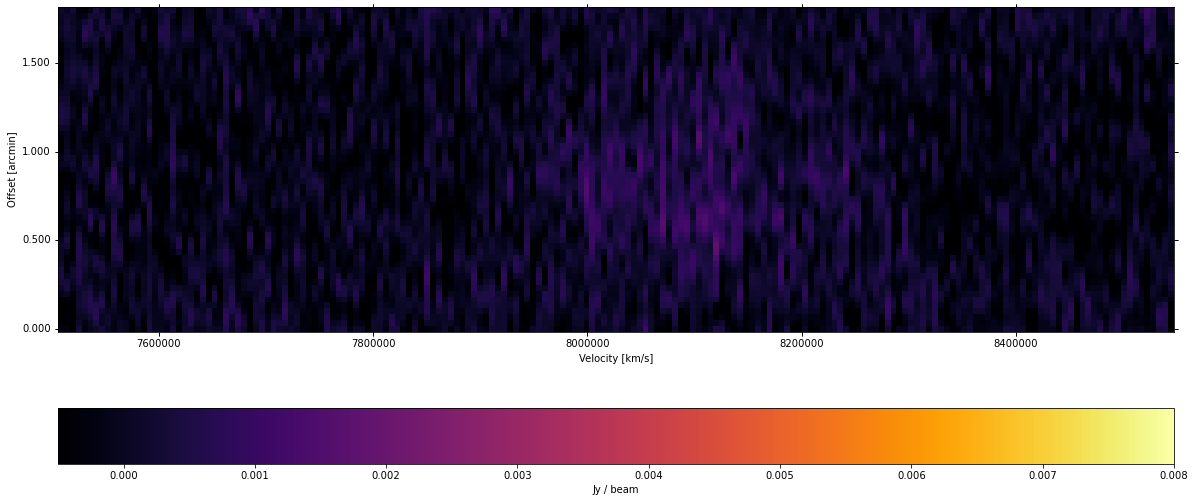

In [642]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram2.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
plt.savefig('S4ax.pdf', bbox_inches='tight')

In [643]:
loc = 'data/'
vers = 'pbcorr' 
name= '_J1059_09_HI.image'
fullname = loc+vers+name
ext = '.fits'
image = '_N1'
mom1 = '_mom1'
outloc = loc+ 'plots/' +vers+name
optname = '_highresoptical'
imagename = fullname+image+ext
mom1name = fullname+mom1+image+ext
optfile = fullname+optname+image+ext
hdu_list = fits.open(imagename)
hdu0_list = fits.open(mom1name)
#hdu2_list = fits.open(optfile)
cube = SpectralCube.read(hdu_list)
data_mom1 = fits.getdata(mom1name)
header_mom1 = fits.getheader(mom1name)
#data_opt = fits.getdata(optfile)
#header_opt = fits.getheader(optfile)
print(cube)
image_data = hdu_list[0].data
print(type(image_data))
print(image_data.shape)

SpectralCube with shape=(189, 130, 70) and unit=Jy / beam:
 n_x:     70  type_x: RA---SIN  unit_x: deg    range:   165.356946 deg:  165.396040 deg
 n_y:    130  type_y: DEC--SIN  unit_y: deg    range:   -10.362418 deg:  -10.290685 deg
 n_s:    189  type_s: VRAD      unit_s: m / s  range:  7508465.359 m / s: 8544933.433 m / s
<class 'numpy.ndarray'>
(189, 130, 70)


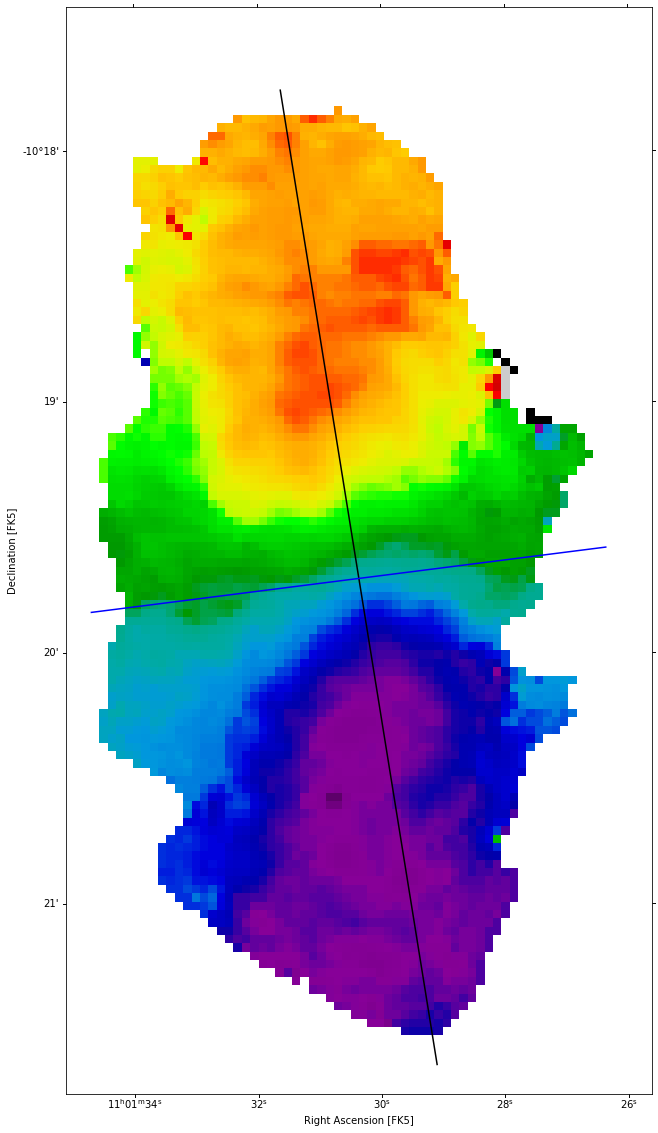

In [667]:
path = Path([(25,120),(44,2)])
path2 = Path([(2,57),(65,65)])


plt.figure(figsize = (20,20))
ax = plt.subplot(111, projection= wcs.WCS(header_mom1))

ax.imshow(data_mom1, cmap='nipy_spectral', vmin=7900, vmax=8300)
path.show_on_axis(ax, spacing=1, color ='k')
path2.show_on_axis(ax, spacing=1, color ='b')
#path3.show_on_axis(ax, spacing=1)
#path4.show_on_axis(ax, spacing=1)

ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")
#plt.savefig('S4mom1.pdf', bbox_inches='tight')

In [668]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
pvdiagram2 = extract_pv_slice(cube=cube, path=path2, spacing=1)

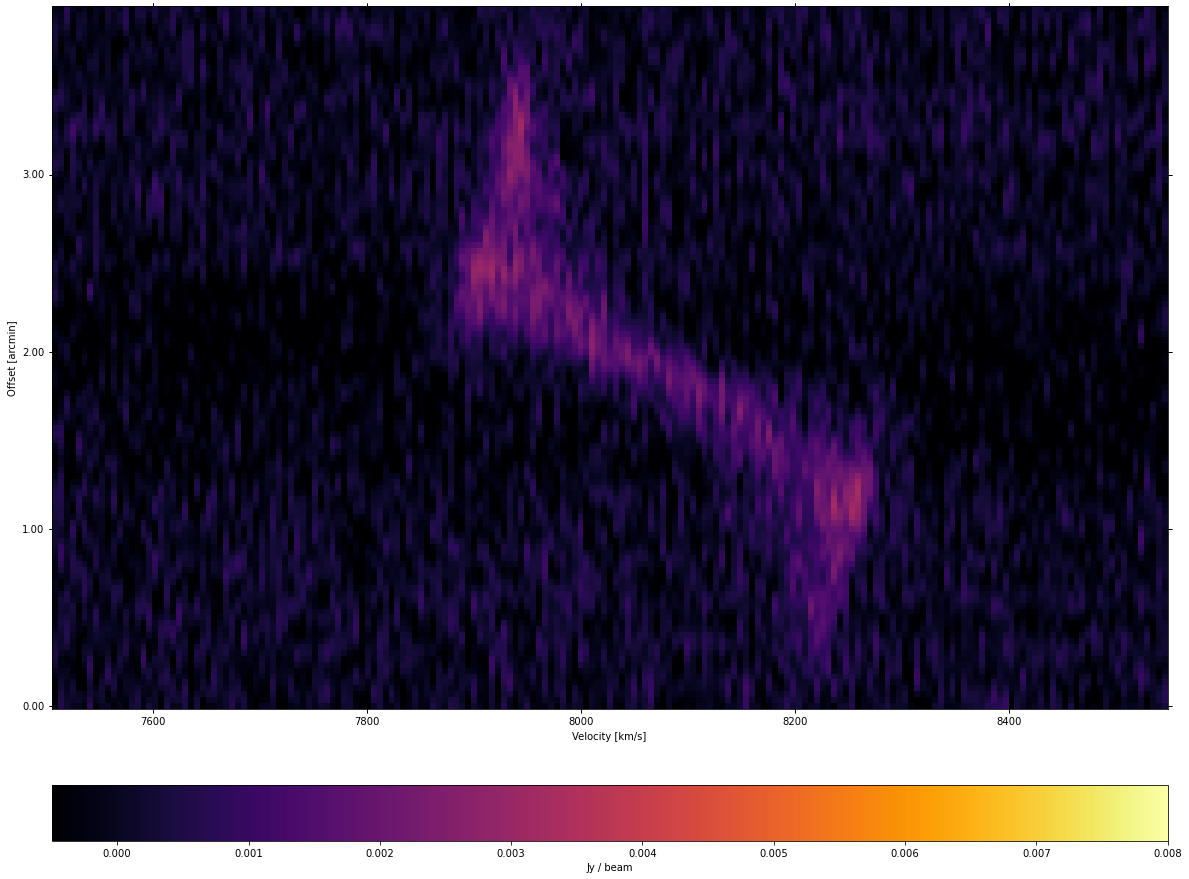

In [671]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S4ax.pdf', bbox_inches='tight')

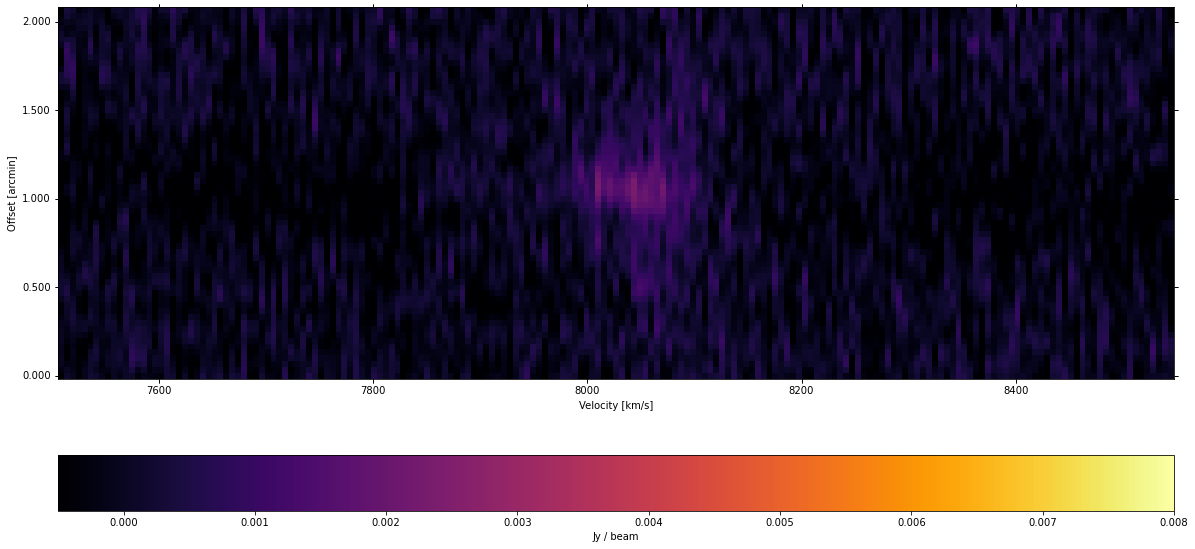

In [670]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram2.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S4ax.pdf', bbox_inches='tight')

In [704]:
loc = 'data/'
vers = 'pbcorr' 
name= '_J1059_09_HI.image'
fullname = loc+vers+name
ext = '.fits'
image = '_N2'
mom1 = '_mom1'
outloc = loc+ 'plots/' +vers+name
optname = '_highresoptical'
imagename = fullname+image+ext
mom1name = fullname+mom1+image+ext
optfile = fullname+optname+image+ext
hdu_list = fits.open(imagename)
hdu0_list = fits.open(mom1name)
#hdu2_list = fits.open(optfile)
cube = SpectralCube.read(hdu_list)
data_mom1 = fits.getdata(mom1name)
header_mom1 = fits.getheader(mom1name)
#data_opt = fits.getdata(optfile)
#header_opt = fits.getheader(optfile)
print(cube)
image_data = hdu_list[0].data
print(type(image_data))
print(image_data.shape)

SpectralCube with shape=(189, 200, 200) and unit=Jy / beam:
 n_x:    200  type_x: RA---SIN  unit_x: deg    range:   165.283483 deg:  165.396040 deg
 n_y:    200  type_y: DEC--SIN  unit_y: deg    range:   -10.362526 deg:  -10.251794 deg
 n_s:    189  type_s: VRAD      unit_s: m / s  range:  7508465.359 m / s: 8544933.433 m / s
<class 'numpy.ndarray'>
(189, 200, 200)


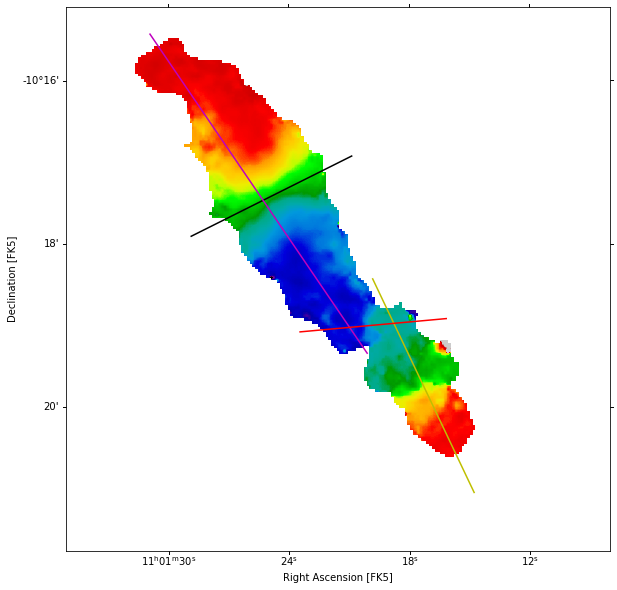

In [780]:
path = Path([(45,115),(105,145)])
path2 = Path([(30,190),(111,71)])
path3 = Path([(112,100),(150,20)])
path4 = Path([(85,80),(140,85)])

plt.figure(figsize = (10,10))
ax = plt.subplot(111, projection= wcs.WCS(header_mom1))

ax.imshow(data_mom1, cmap='nipy_spectral', vmin=7700, vmax=8200)
path.show_on_axis(ax, spacing=1, color ='k')
path2.show_on_axis(ax, spacing=1, color ='m')
path3.show_on_axis(ax, spacing=1, color = 'y')
path4.show_on_axis(ax, spacing=1, color = 'r')

ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")
#plt.savefig('S4mom1.pdf', bbox_inches='tight')

In [781]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
pvdiagram2 = extract_pv_slice(cube=cube, path=path2, spacing=1)
pvdiagram3 = extract_pv_slice(cube=cube, path=path3, spacing=1)
pvdiagram4 = extract_pv_slice(cube=cube, path=path4, spacing=1)

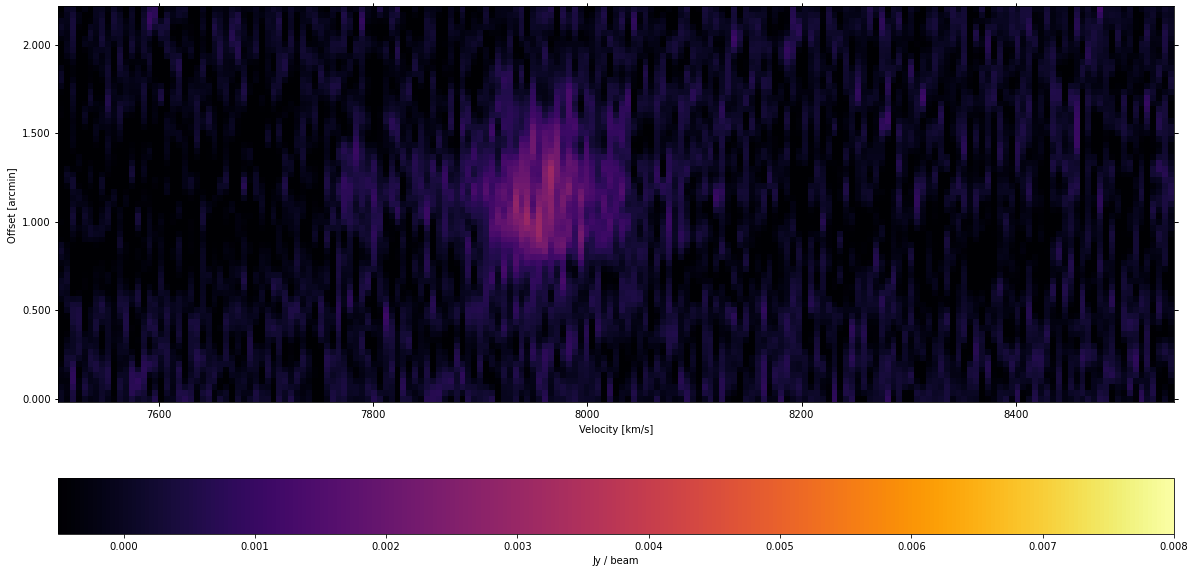

In [764]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S4ax.pdf', bbox_inches='tight')

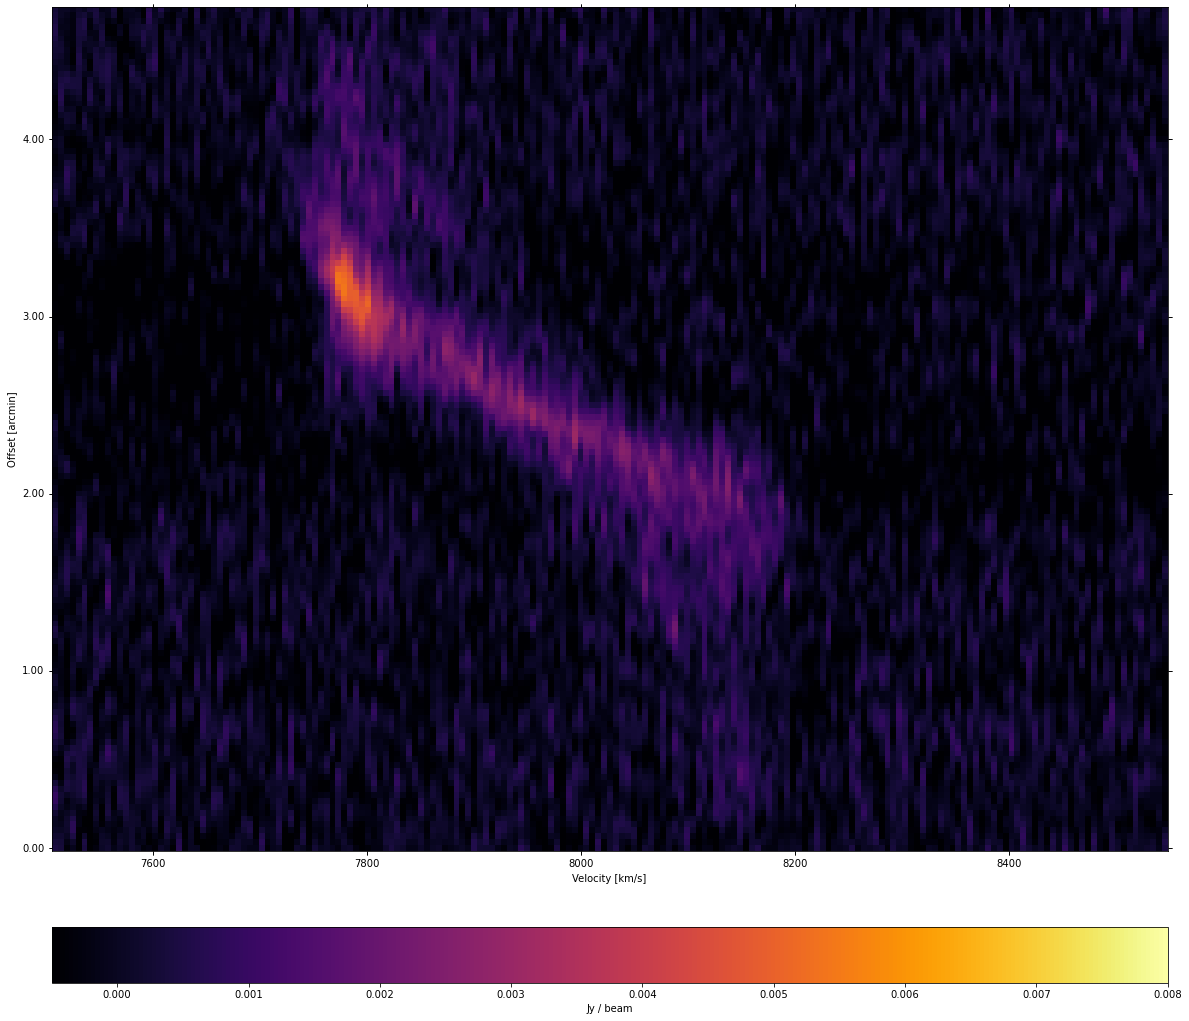

In [765]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram2.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S4ax.pdf', bbox_inches='tight')

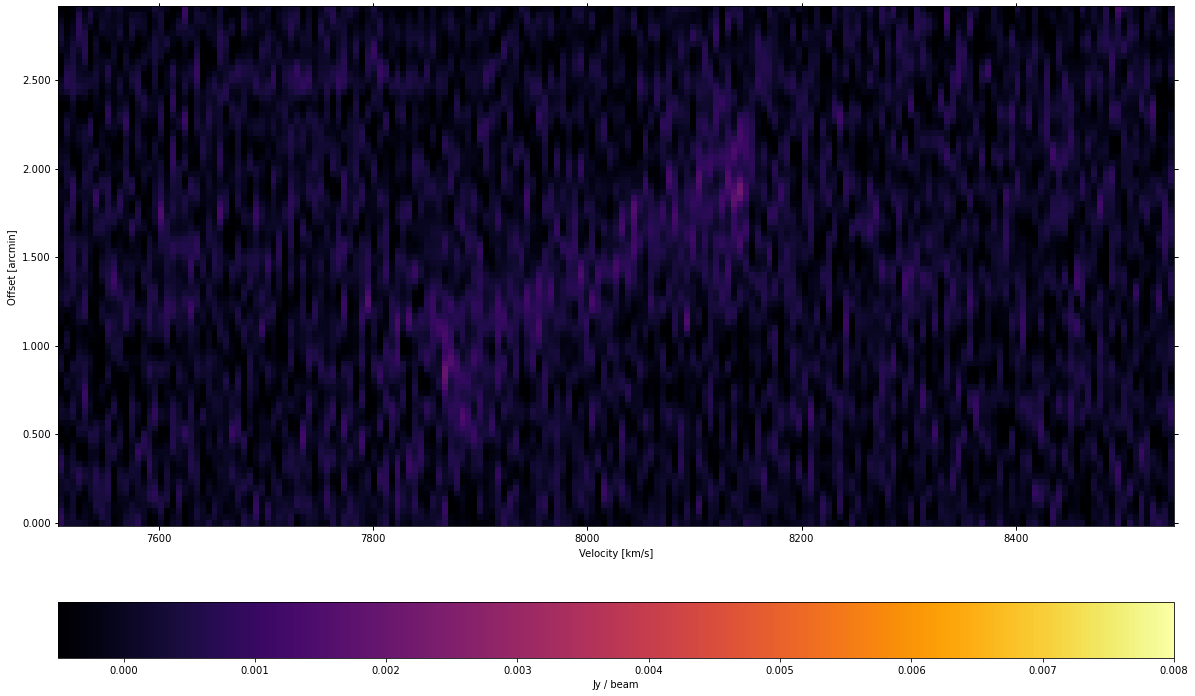

In [766]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram3.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S4ax.pdf', bbox_inches='tight')

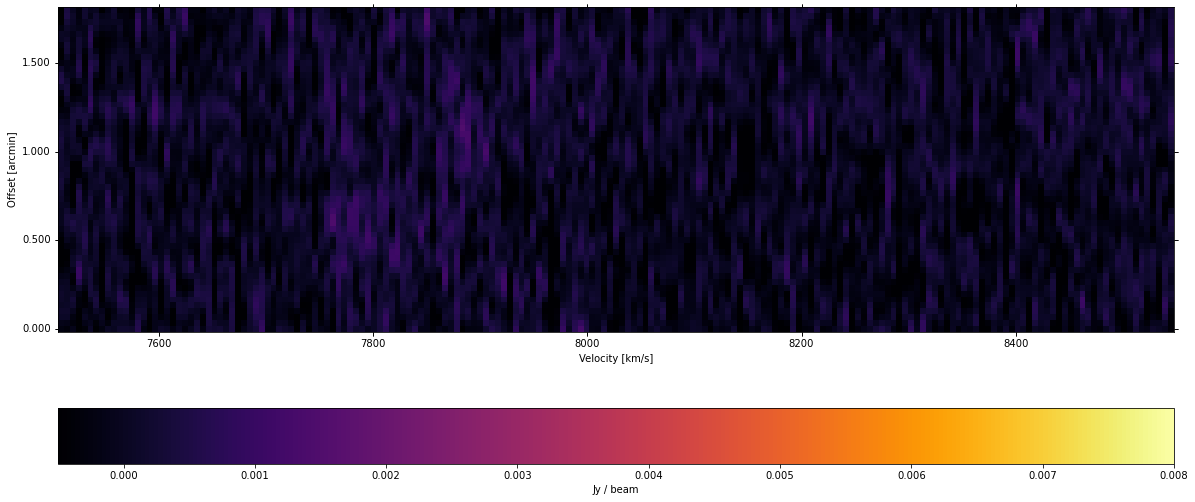

In [785]:
ww = wcs.WCS(pvdiagram.header)
plt.figure(figsize = (20,20))
ax = pl.subplot(111,projection=ww, slices=('y', 'x'))
im = ax.imshow(pvdiagram4.data.T,cmap = 'inferno', vmin = -0.0005, vmax = 0.008)
cb = pl.colorbar(mappable=im,pad=.07,orientation='horizontal')
#cb.set_label("Brightness Temperature [K]")
#ax.set_aspect(1.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)
cb.set_label(cube.unit)
ax.set_xlabel("Velocity [km/s]")
ax.set_ylabel("Offset [arcmin]")
ax.invert_xaxis() 
#plt.savefig('S4ax.pdf', bbox_inches='tight')